# Module-4: Data Processing for Timeseries Forecasting	


# A- Overview of the Section




# 1-Dataset Significance


2. Famous platforms for authenticated datasets

    1. <a href="https://www.kaggle.com/datasets">Kaggle</a>
    
    2. <a href="https://github.com/A-I-Studio/Datasets">Github</a>
    
    3. <a href="https://huggingface.co/datasets">Hugging Face</a>
    
    4. <a href="https://www.worlddata.info/">Data World</a>
    

So now lets start working on our dataset

# 2-Overview of the Dataset

**1. Import Libraries**


In [2]:
import pandas as pd
import numpy as np
air_pollution = pd.read_csv('datasets/air_pollution.csv', parse_dates=['date'])

air_pollution.set_index('date', inplace=True)

air_pollution

pollution_today        dew       temp        press     wnd_spd  \
date                                                                         
2010-01-02       145.958333  -8.500000  -5.125000  1024.750000   24.860000   
2010-01-03        78.833333 -10.125000  -8.541667  1022.791667   70.937917   
2010-01-04        31.333333 -20.875000 -11.500000  1029.291667  111.160833   
2010-01-05        42.458333 -24.583333 -14.458333  1033.625000   56.920000   
2010-01-06        56.416667 -23.708333 -12.541667  1033.750000   18.511667   
...                     ...        ...        ...          ...         ...   
2014-12-27       238.666667  -9.666667  -1.791667  1027.833333    9.278333   
2014-12-28       197.375000 -10.791667   1.583333  1019.958333   10.948750   
2014-12-29       159.000000 -12.333333   0.750000  1013.750000    8.000000   
2014-12-30        46.083333 -13.916667   1.875000  1019.125000    9.778333   
2014-12-31        10.041667 -21.791667  -1.916667  1032.125000  167.458333   

                 snow  rain  pollution_yesterday  
date                                              
2010-01-02   0.708333   0.0            10.041667  
2010-01-03  14.166667   0.0           145.958333  
2010-01-04   0.000000   0.0            78.833333  
2010-01-05   0.000000   0.0            31.333333  
2010-01-06   0.000000   0.0            42.458333  
...               ...   ...                  ...  
2014-12-27   0.000000   0.0           170.250000  
2014-12-28   0.000000   0.0           238.666667  
2014-12-29   0.000000   0.0           197.375000  
2014-12-30   0.000000   0.0           159.000000  
2014-12-31   0.000000   0.0            46.083333  

[1825 rows x 8 columns]

In [3]:
air_pollution.head(3)

pollution_today     dew       temp        press     wnd_spd  \
date                                                                      
2010-01-02       145.958333  -8.500  -5.125000  1024.750000   24.860000   
2010-01-03        78.833333 -10.125  -8.541667  1022.791667   70.937917   
2010-01-04        31.333333 -20.875 -11.500000  1029.291667  111.160833   

                 snow  rain  pollution_yesterday  
date                                              
2010-01-02   0.708333   0.0            10.041667  
2010-01-03  14.166667   0.0           145.958333  
2010-01-04   0.000000   0.0            78.833333

In [4]:
air_pollution.tail(3)

pollution_today        dew      temp     press     wnd_spd  snow  \
date                                                                           
2014-12-29       159.000000 -12.333333  0.750000  1013.750    8.000000   0.0   
2014-12-30        46.083333 -13.916667  1.875000  1019.125    9.778333   0.0   
2014-12-31        10.041667 -21.791667 -1.916667  1032.125  167.458333   0.0   

            rain  pollution_yesterday  
date                                   
2014-12-29   0.0           197.375000  
2014-12-30   0.0           159.000000  
2014-12-31   0.0            46.083333

# 3- Manipulation in the Dataset

**1. Lets have the overview of our dataset here**

In [5]:
air_pollution.columns

Index(['pollution_today', 'dew', 'temp', 'press', 'wnd_spd', 'snow', 'rain',
       'pollution_yesterday'],
      dtype='object')

**Lets Checkout the details about the dataset**

In [6]:
air_pollution.describe()

pollution_today          dew         temp        press      wnd_spd  \
count      1825.000000  1825.000000  1825.000000  1825.000000  1825.000000   
mean         98.245080     1.828516    12.459041  1016.447306    23.894307   
std          76.807697    14.163508    11.552997    10.076053    41.373161   
min           3.166667   -33.333333   -14.458333   994.041667     1.412500   
25%          42.333333   -10.083333     1.541667  1007.916667     5.904167   
50%          79.166667     2.041667    13.916667  1016.208333    10.953750   
75%         131.166667    15.083333    23.166667  1024.541667    22.235000   
max         541.895833    26.208333    32.875000  1043.458333   463.187917   

              snow         rain  pollution_yesterday  
count  1825.000000  1825.000000          1825.000000  
mean      0.052763     0.195023            98.245080  
std       0.546072     0.993917            76.807697  
min       0.000000     0.000000             3.166667  
25%       0.000000     0.000000            42.333333  
50%       0.000000     0.000000            79.166667  
75%       0.000000     0.000000           131.166667  
max      14.166667    17.583333           541.895833

**Cover it into a data frame**

In [7]:
air_pollution=pd.DataFrame(air_pollution)
air_pollution

pollution_today        dew       temp        press     wnd_spd  \
date                                                                         
2010-01-02       145.958333  -8.500000  -5.125000  1024.750000   24.860000   
2010-01-03        78.833333 -10.125000  -8.541667  1022.791667   70.937917   
2010-01-04        31.333333 -20.875000 -11.500000  1029.291667  111.160833   
2010-01-05        42.458333 -24.583333 -14.458333  1033.625000   56.920000   
2010-01-06        56.416667 -23.708333 -12.541667  1033.750000   18.511667   
...                     ...        ...        ...          ...         ...   
2014-12-27       238.666667  -9.666667  -1.791667  1027.833333    9.278333   
2014-12-28       197.375000 -10.791667   1.583333  1019.958333   10.948750   
2014-12-29       159.000000 -12.333333   0.750000  1013.750000    8.000000   
2014-12-30        46.083333 -13.916667   1.875000  1019.125000    9.778333   
2014-12-31        10.041667 -21.791667  -1.916667  1032.125000  167.458333   

                 snow  rain  pollution_yesterday  
date                                              
2010-01-02   0.708333   0.0            10.041667  
2010-01-03  14.166667   0.0           145.958333  
2010-01-04   0.000000   0.0            78.833333  
2010-01-05   0.000000   0.0            31.333333  
2010-01-06   0.000000   0.0            42.458333  
...               ...   ...                  ...  
2014-12-27   0.000000   0.0           170.250000  
2014-12-28   0.000000   0.0           238.666667  
2014-12-29   0.000000   0.0           197.375000  
2014-12-30   0.000000   0.0           159.000000  
2014-12-31   0.000000   0.0            46.083333  

[1825 rows x 8 columns]

# 4- Data Preprocessing

Lets check each feature values


In [8]:
from matplotlib import pyplot as plt

In [9]:
values = air_pollution.values

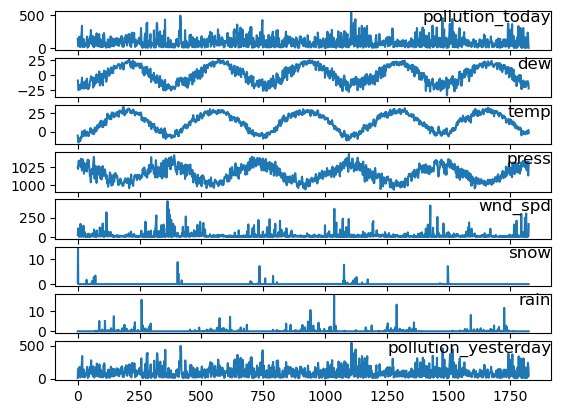

In [12]:
groups = [0,1,2,3,4,5,6,7]
i=1

for group in groups:
    plt.subplot(len(groups),1,i)
    plt.plot(values[:,group])
    plt.title(air_pollution.columns[group], y=0.5, loc="right")
    i +=1

plt.show()

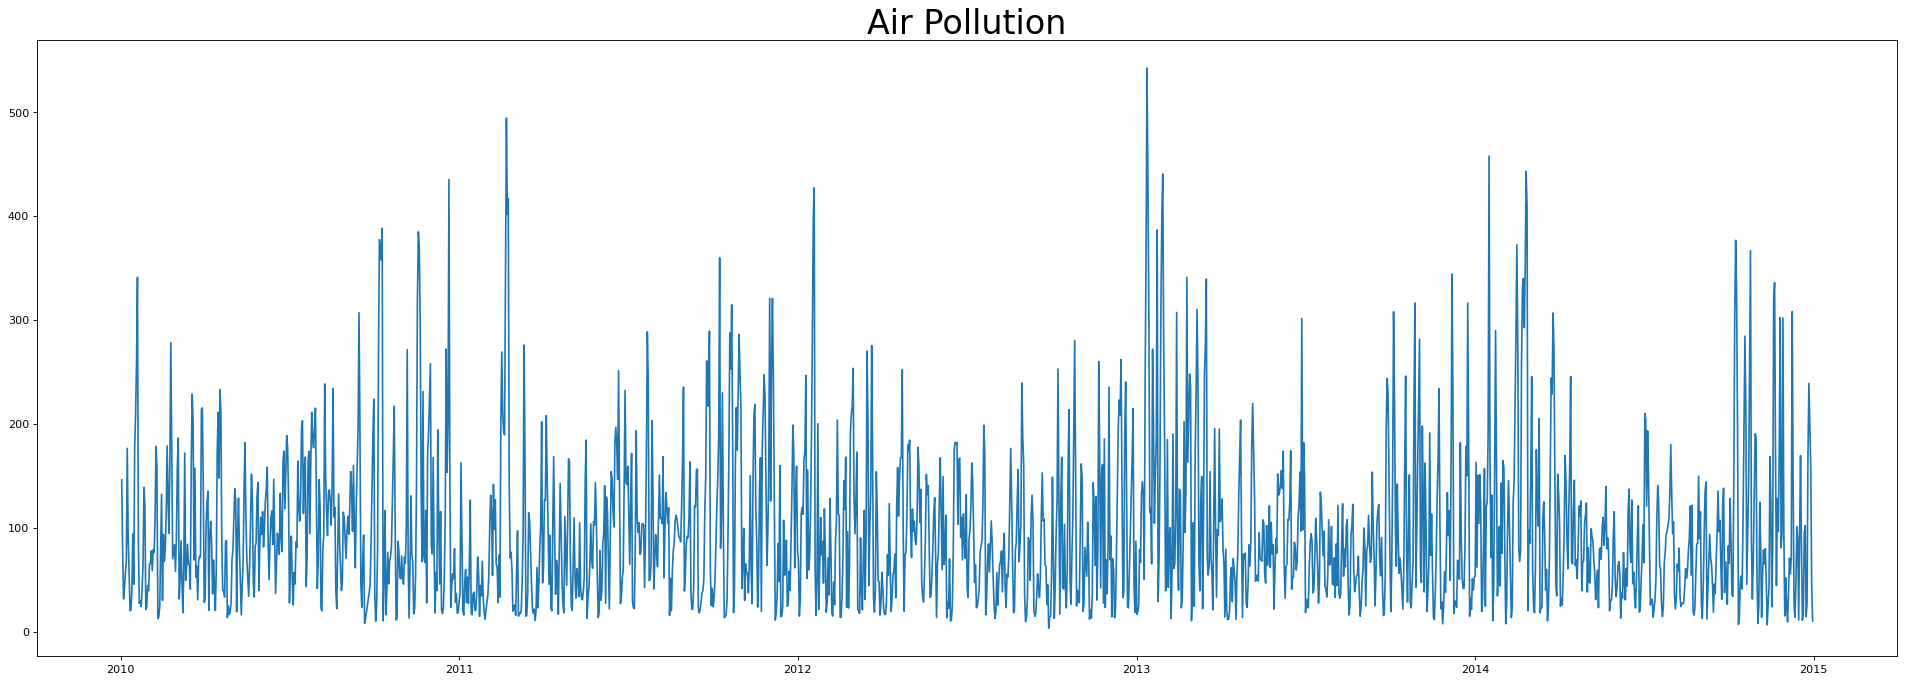

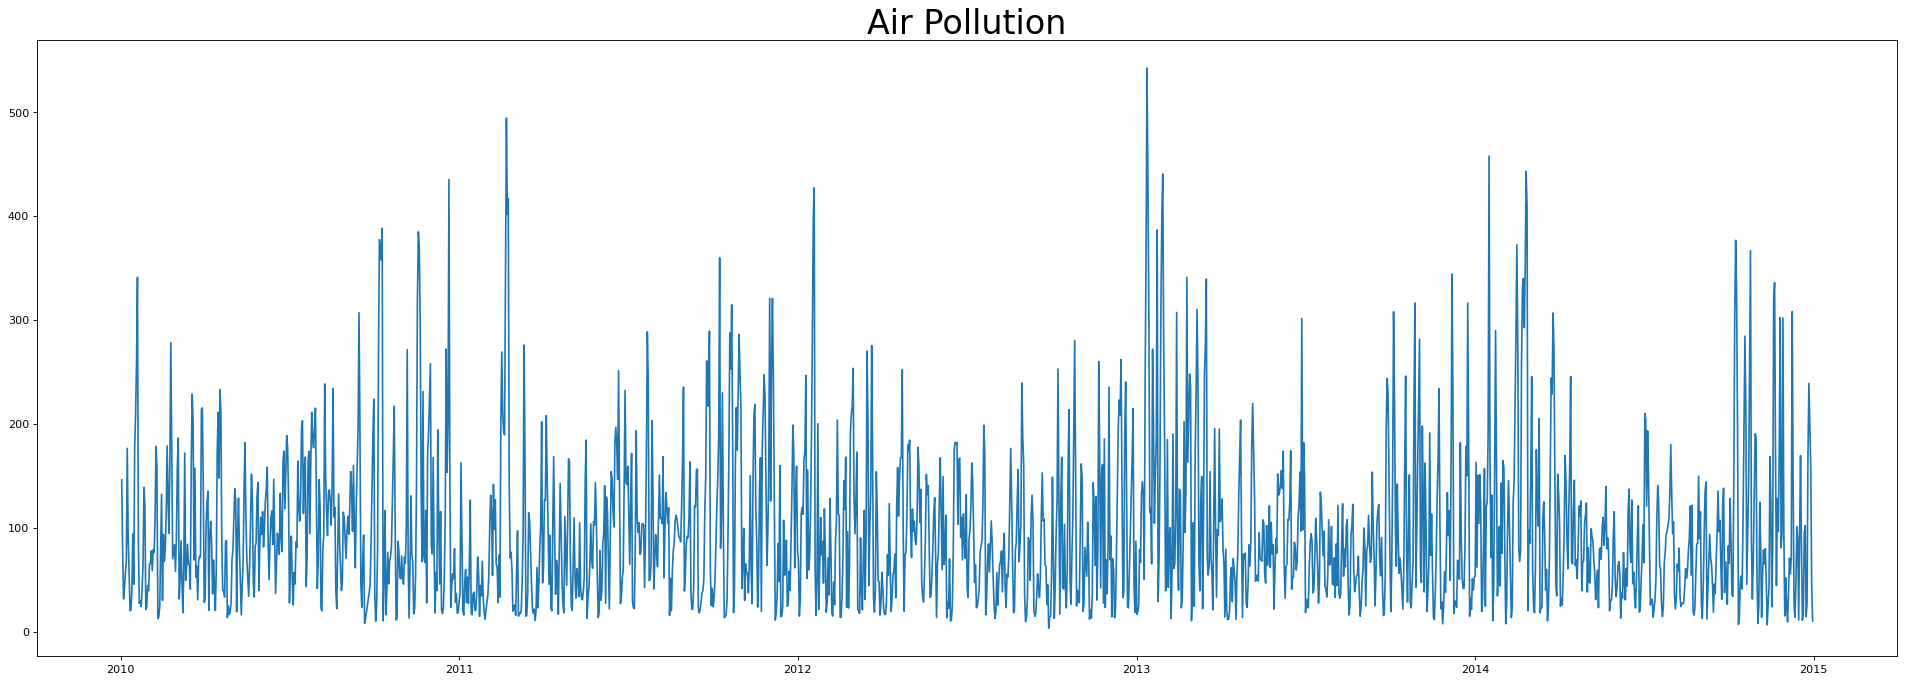

In [14]:
plt.figure(num=None, figsize=(30,10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Air Pollution', fontsize=30)
plt.plot(air_pollution.pollution_today)
plt.show()

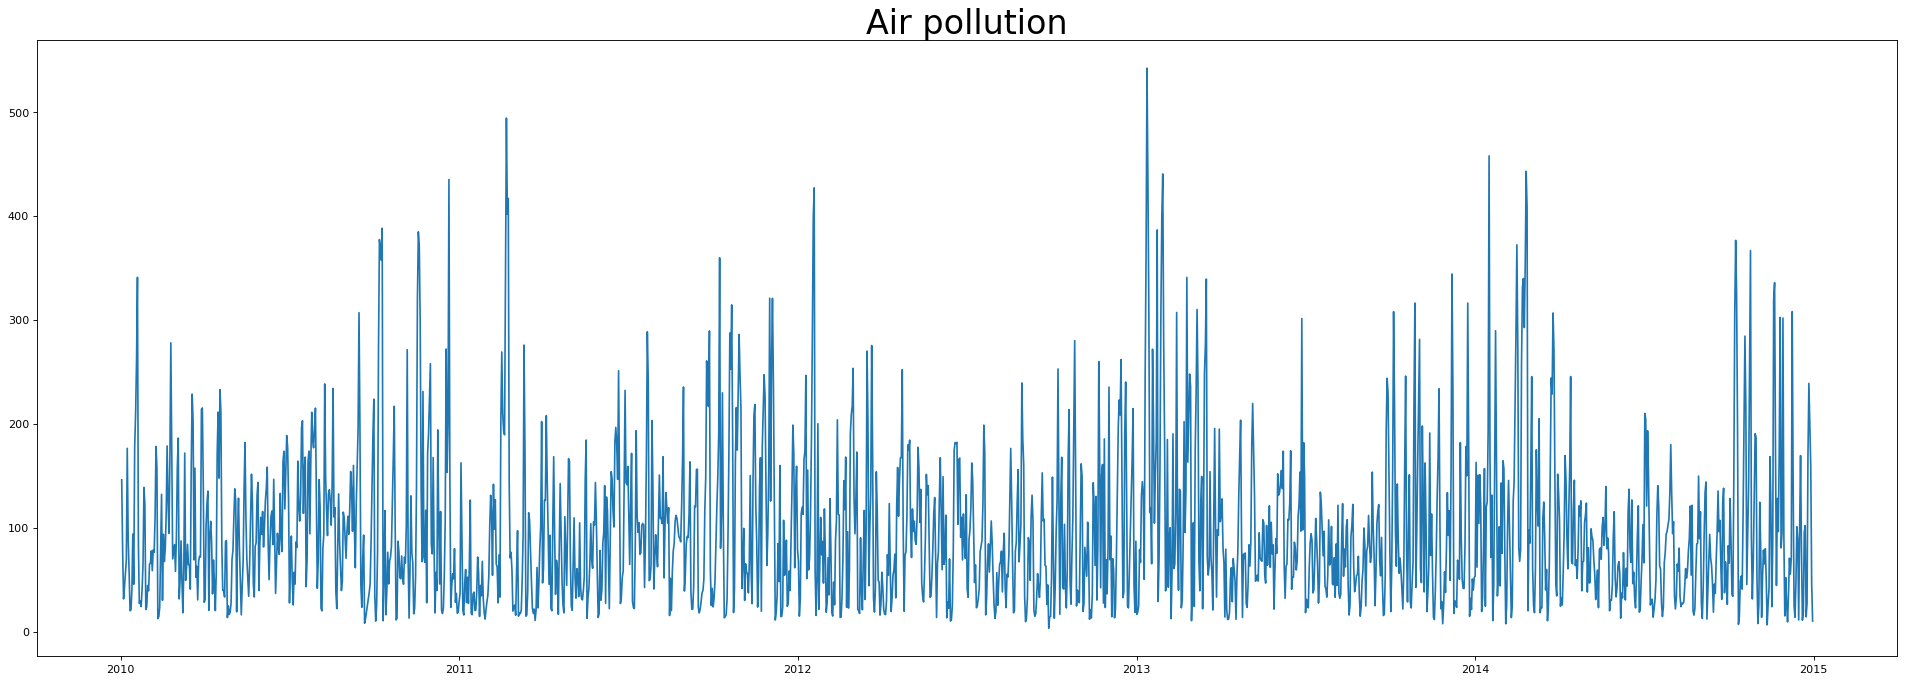

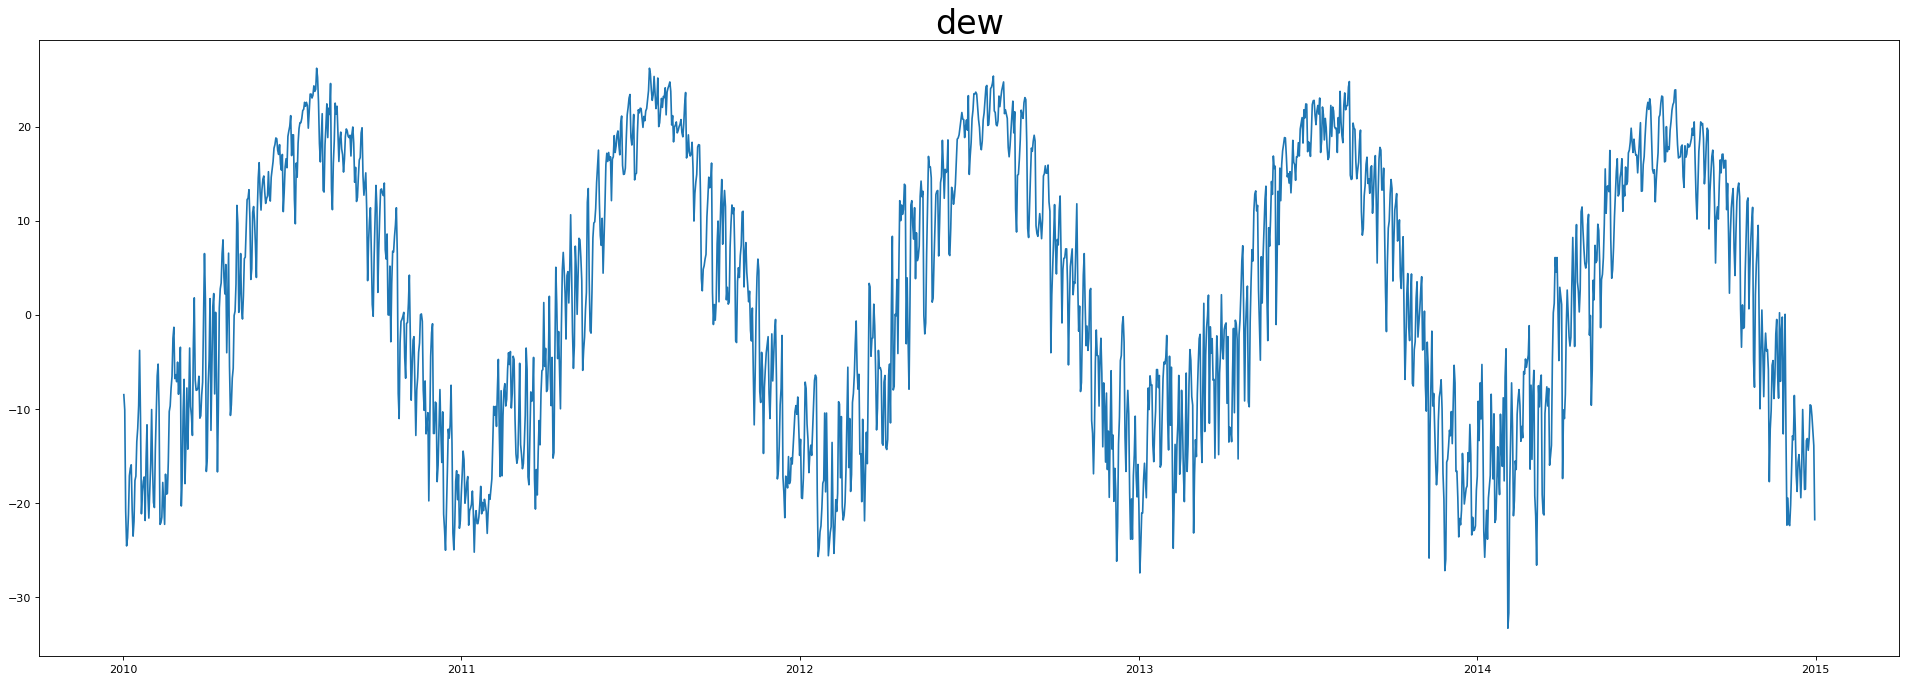

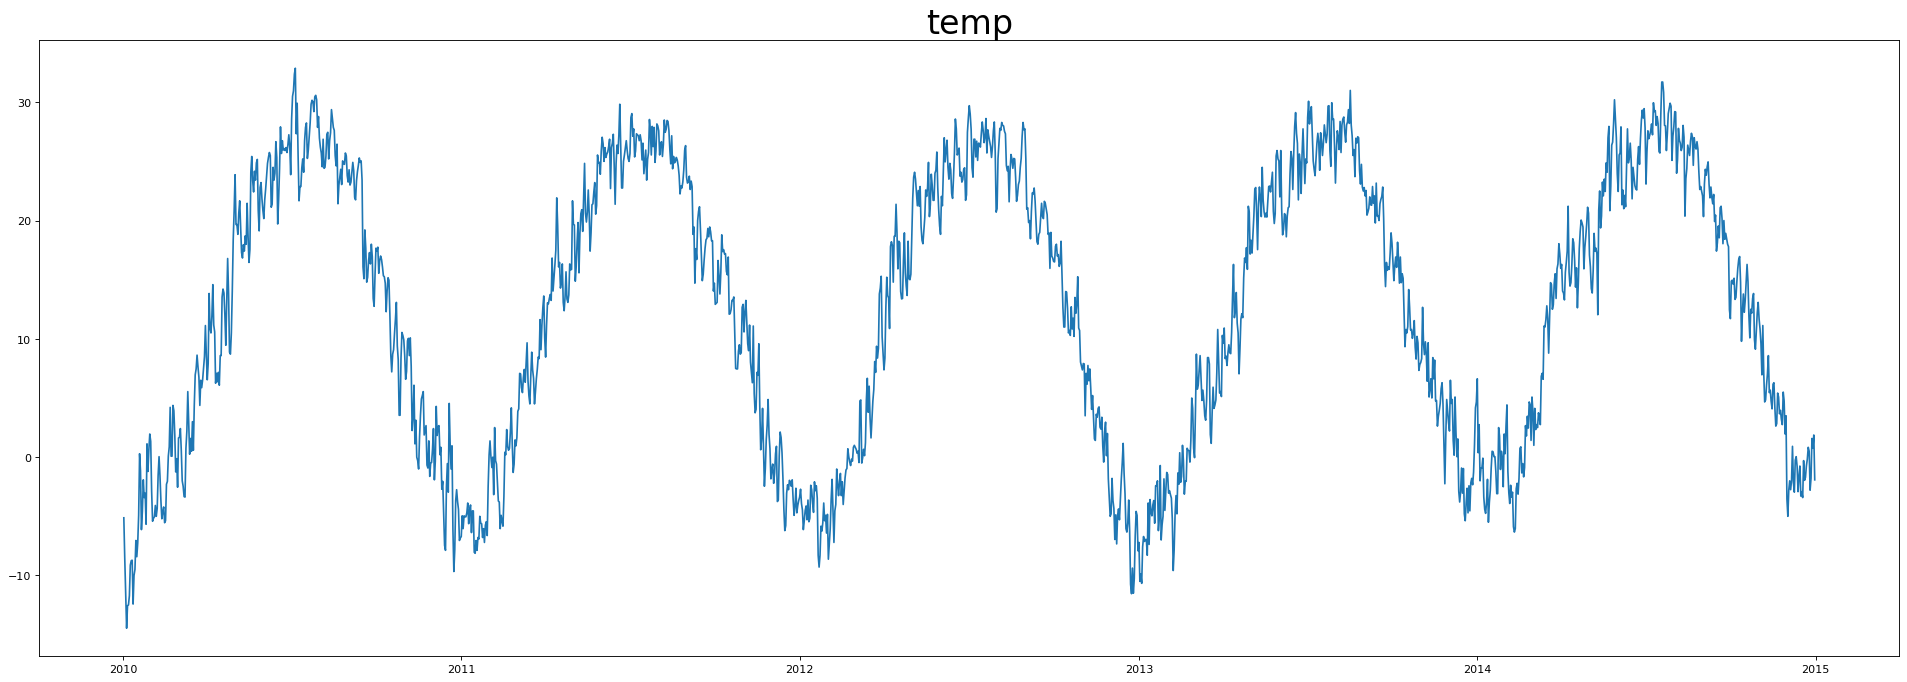

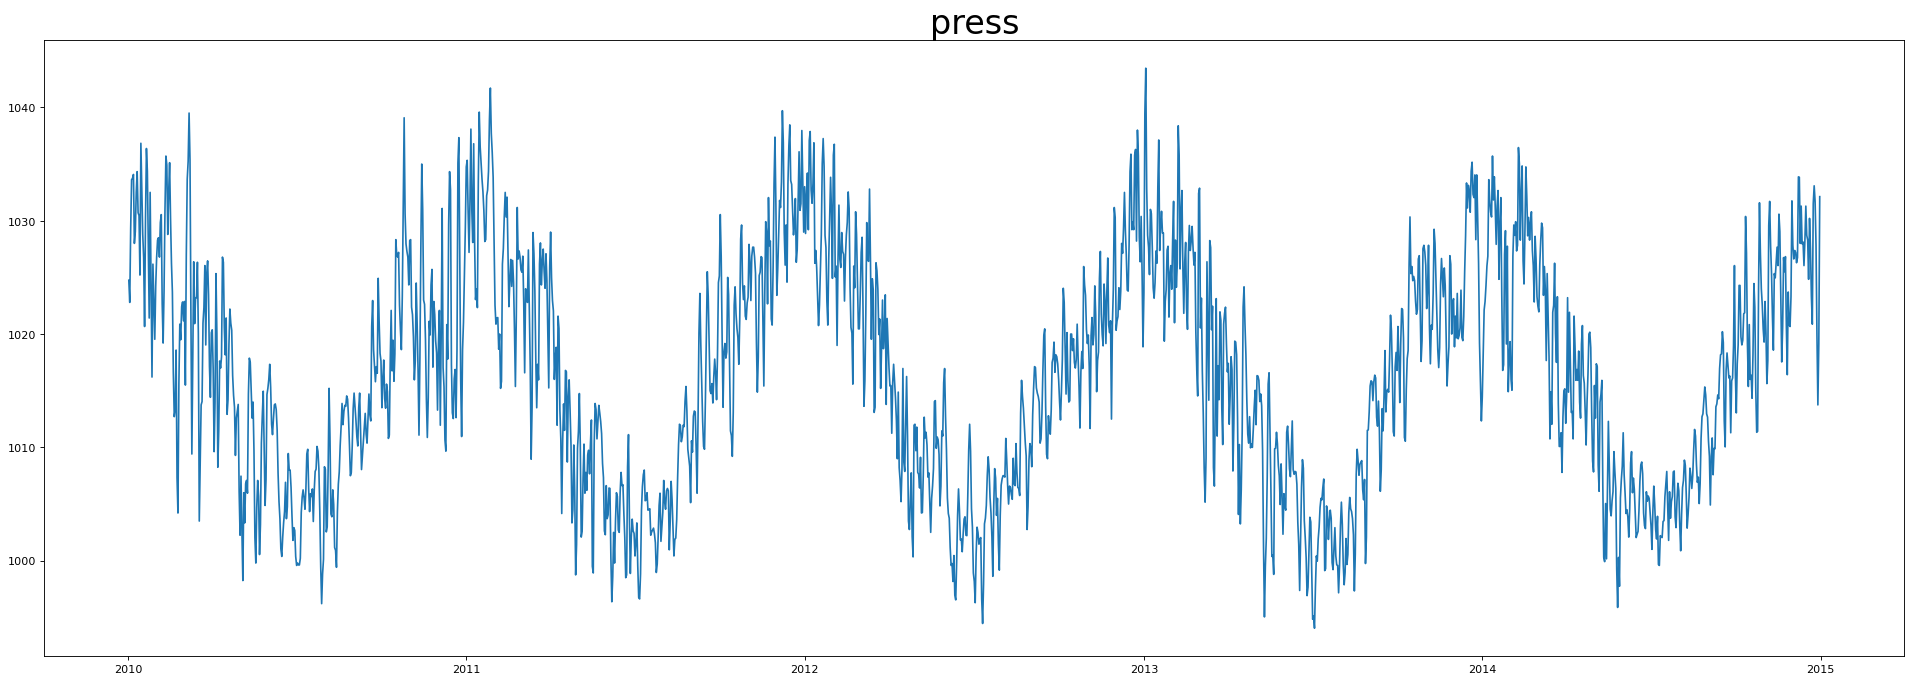

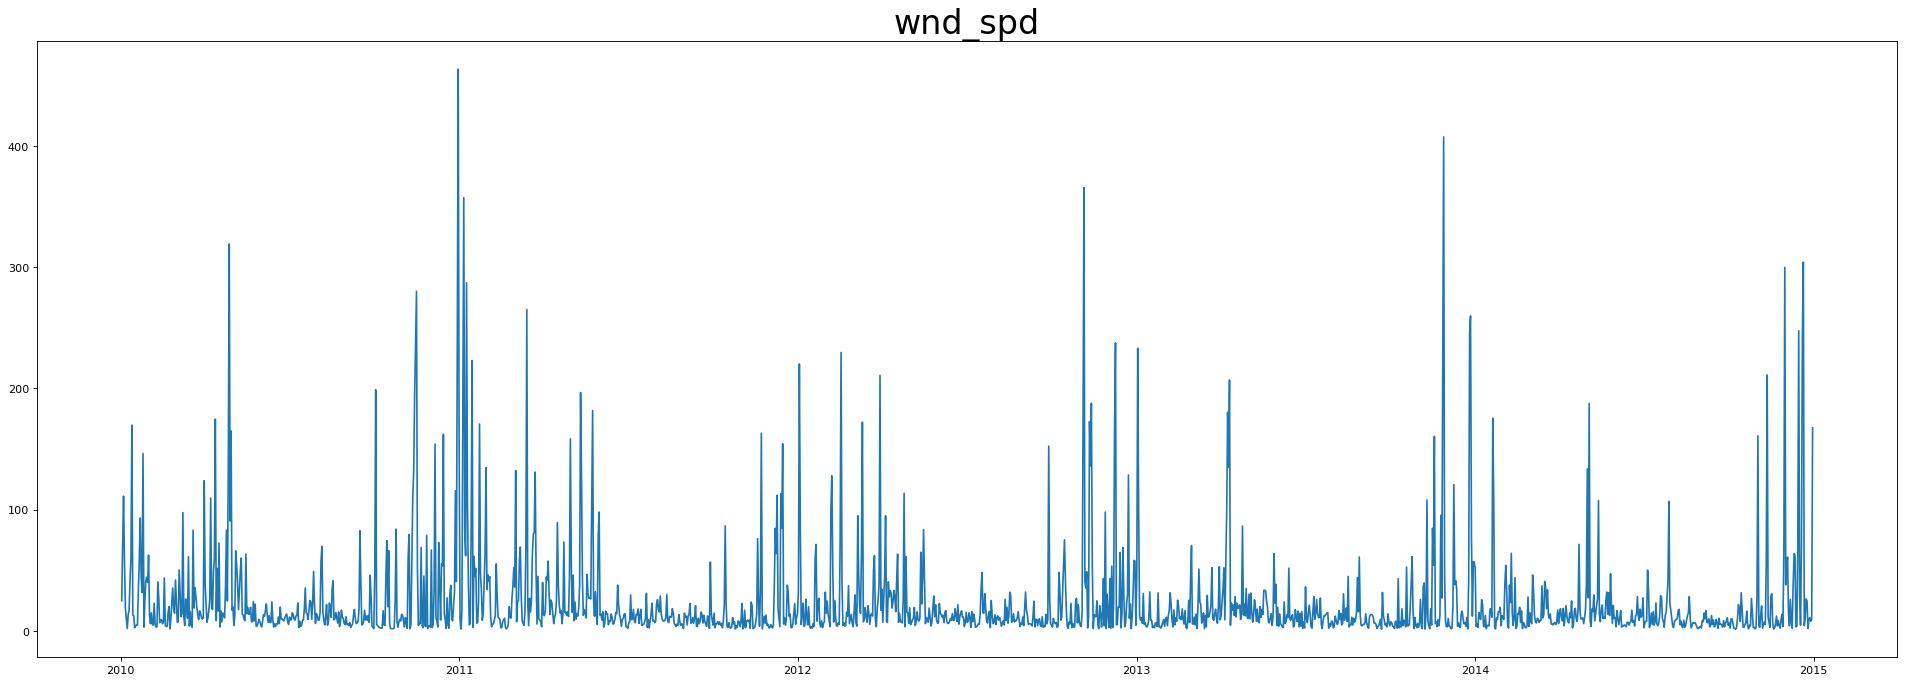

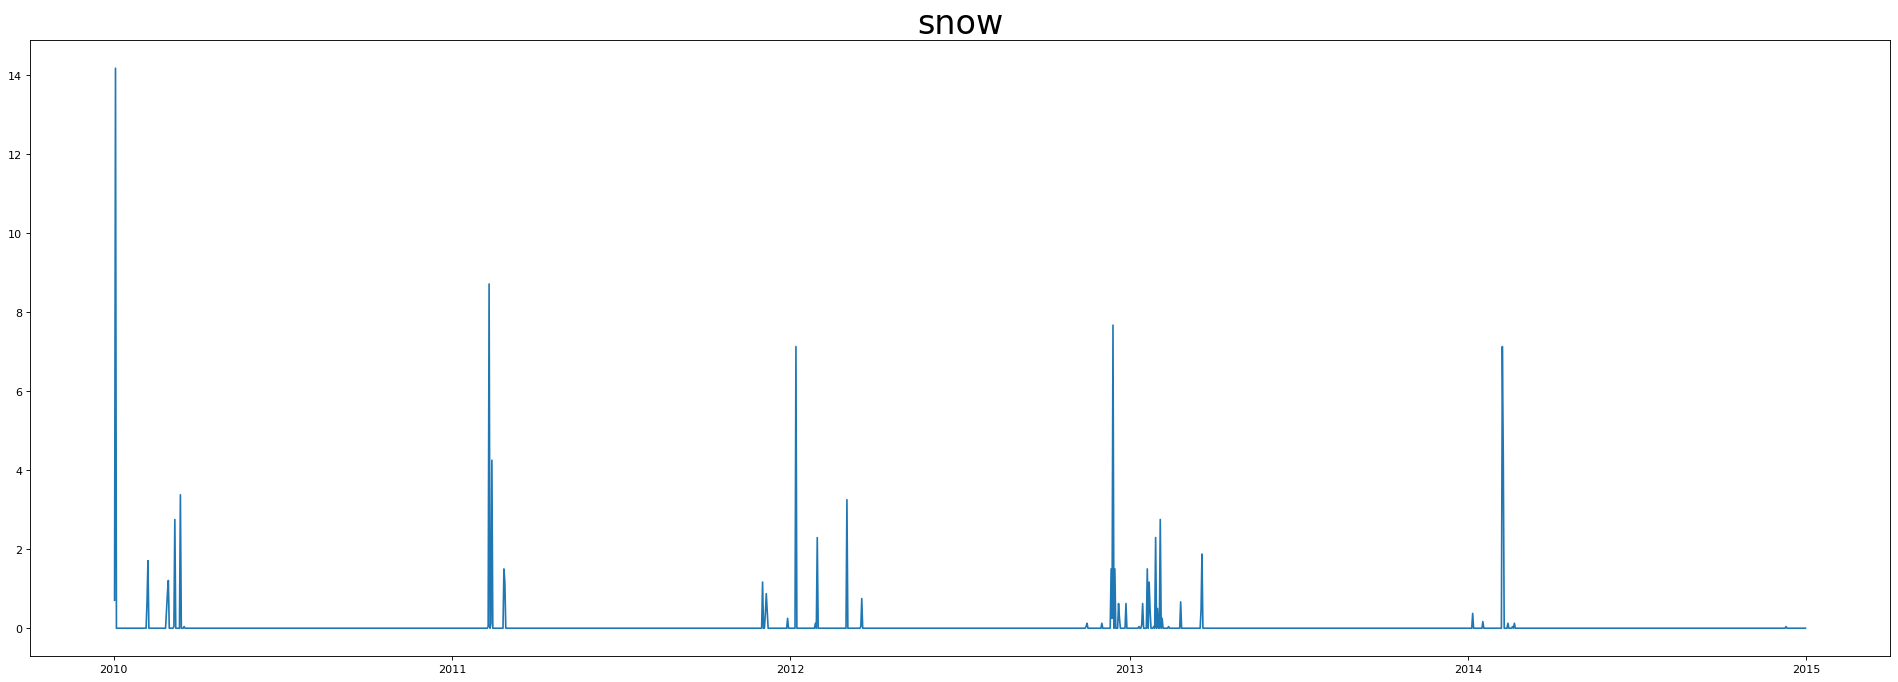

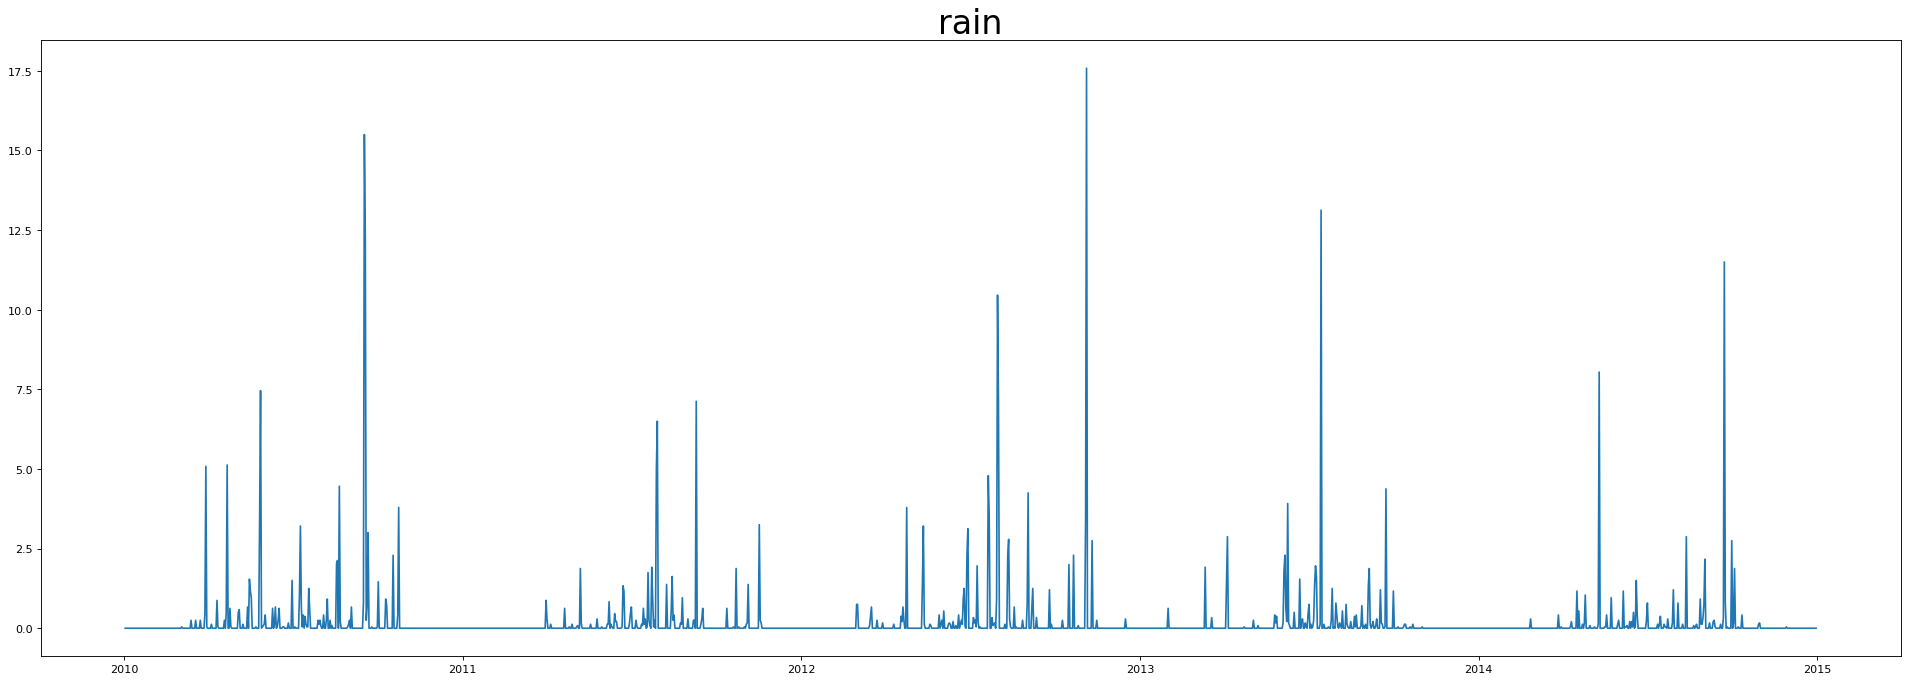

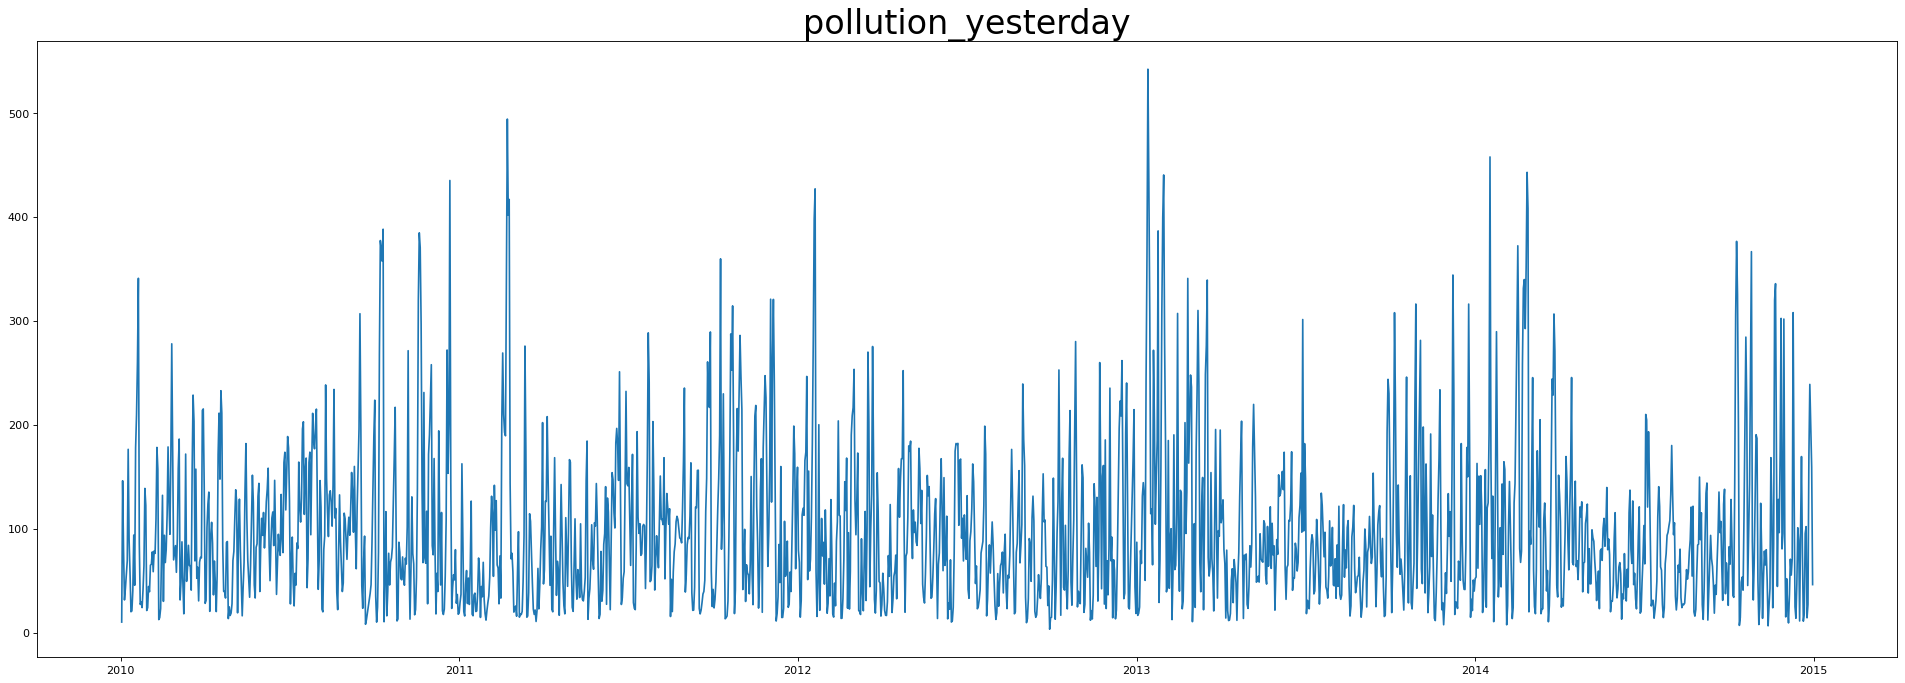

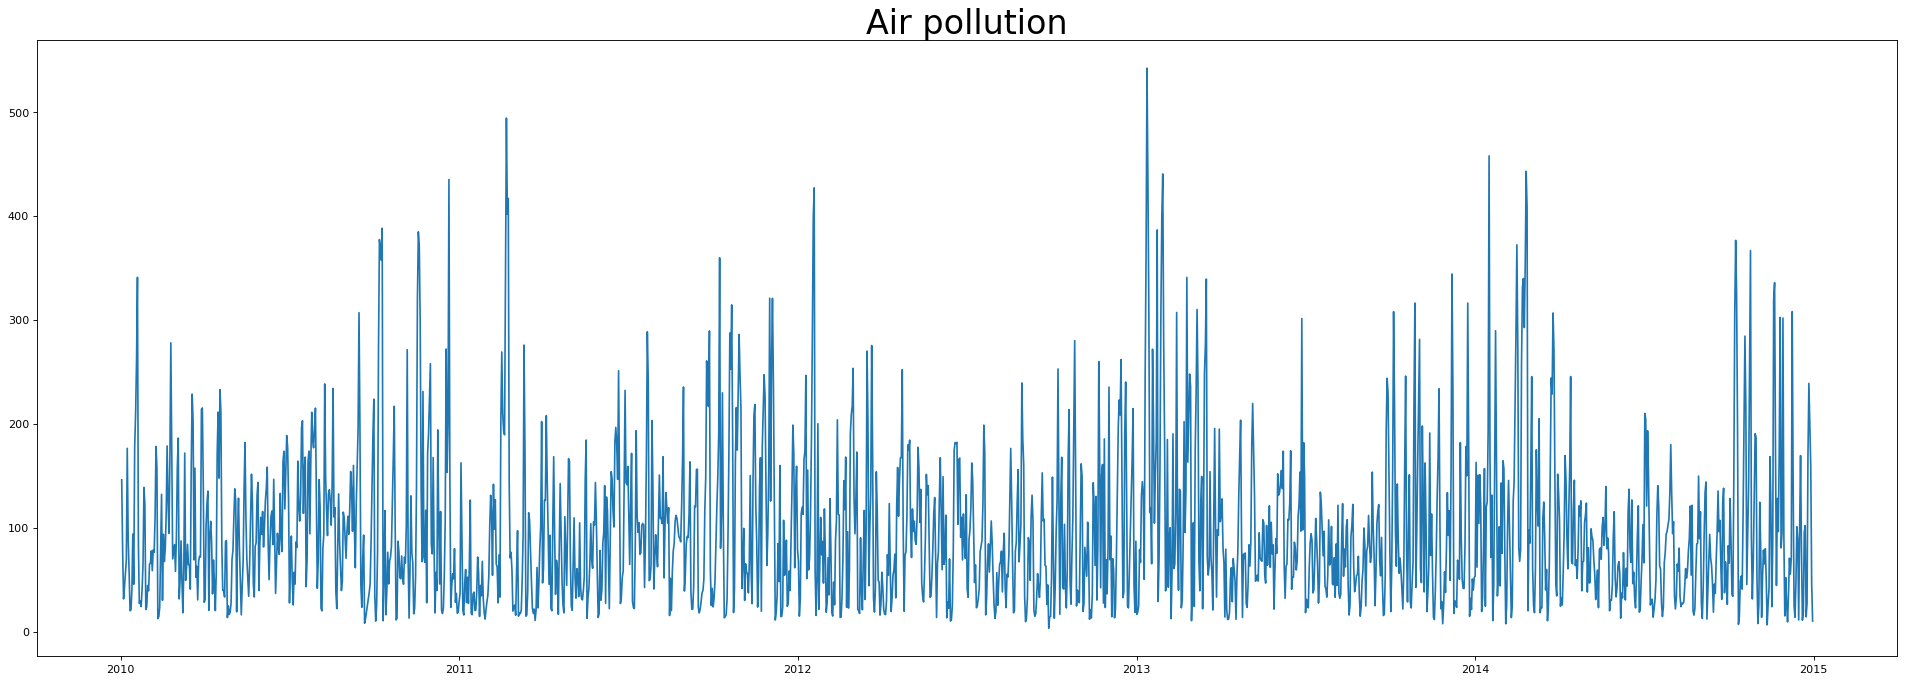

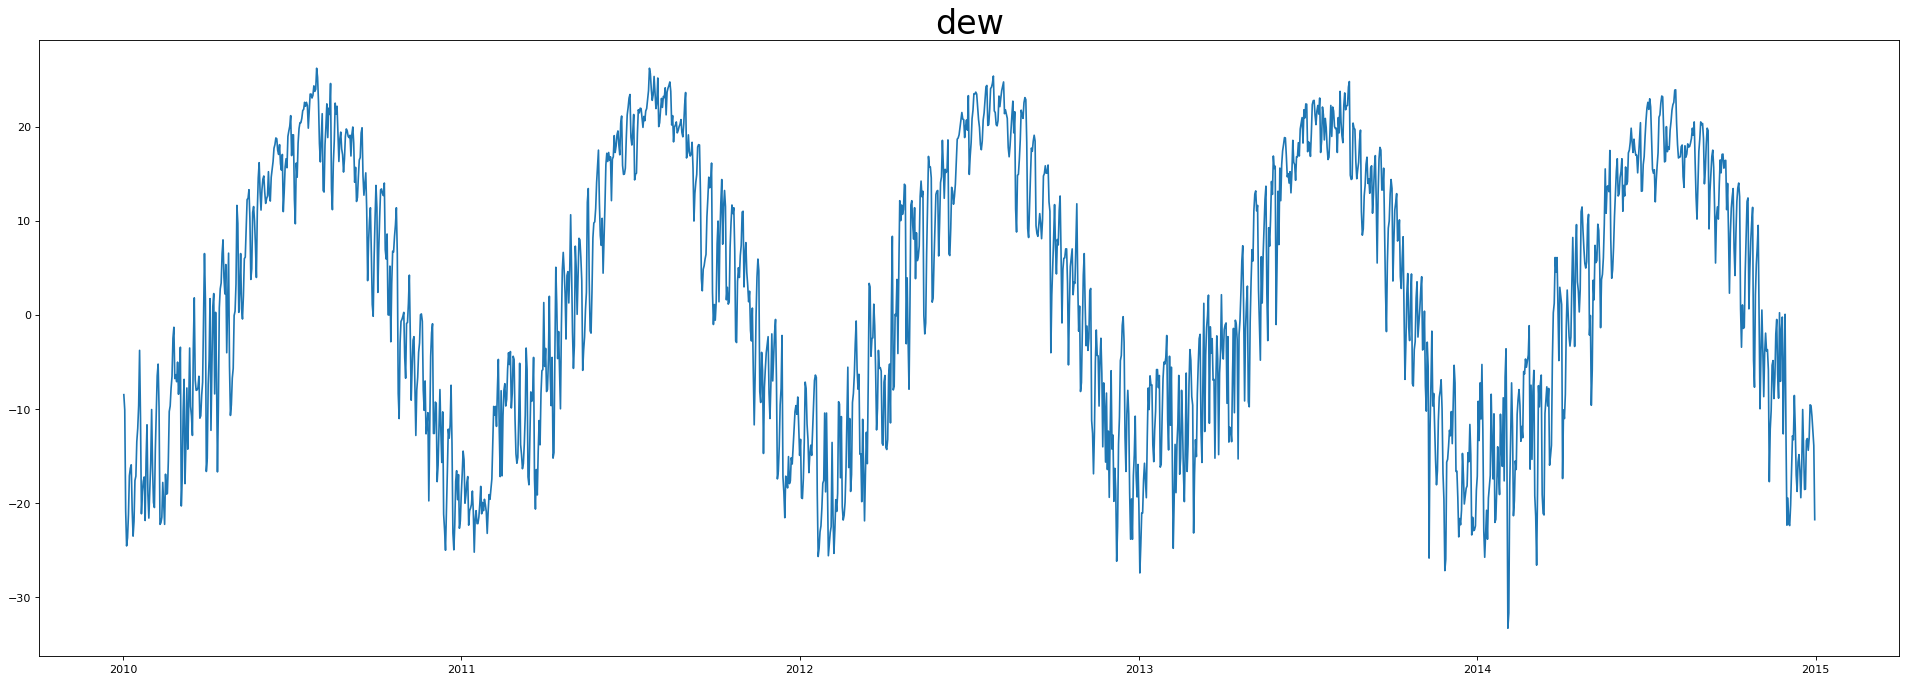

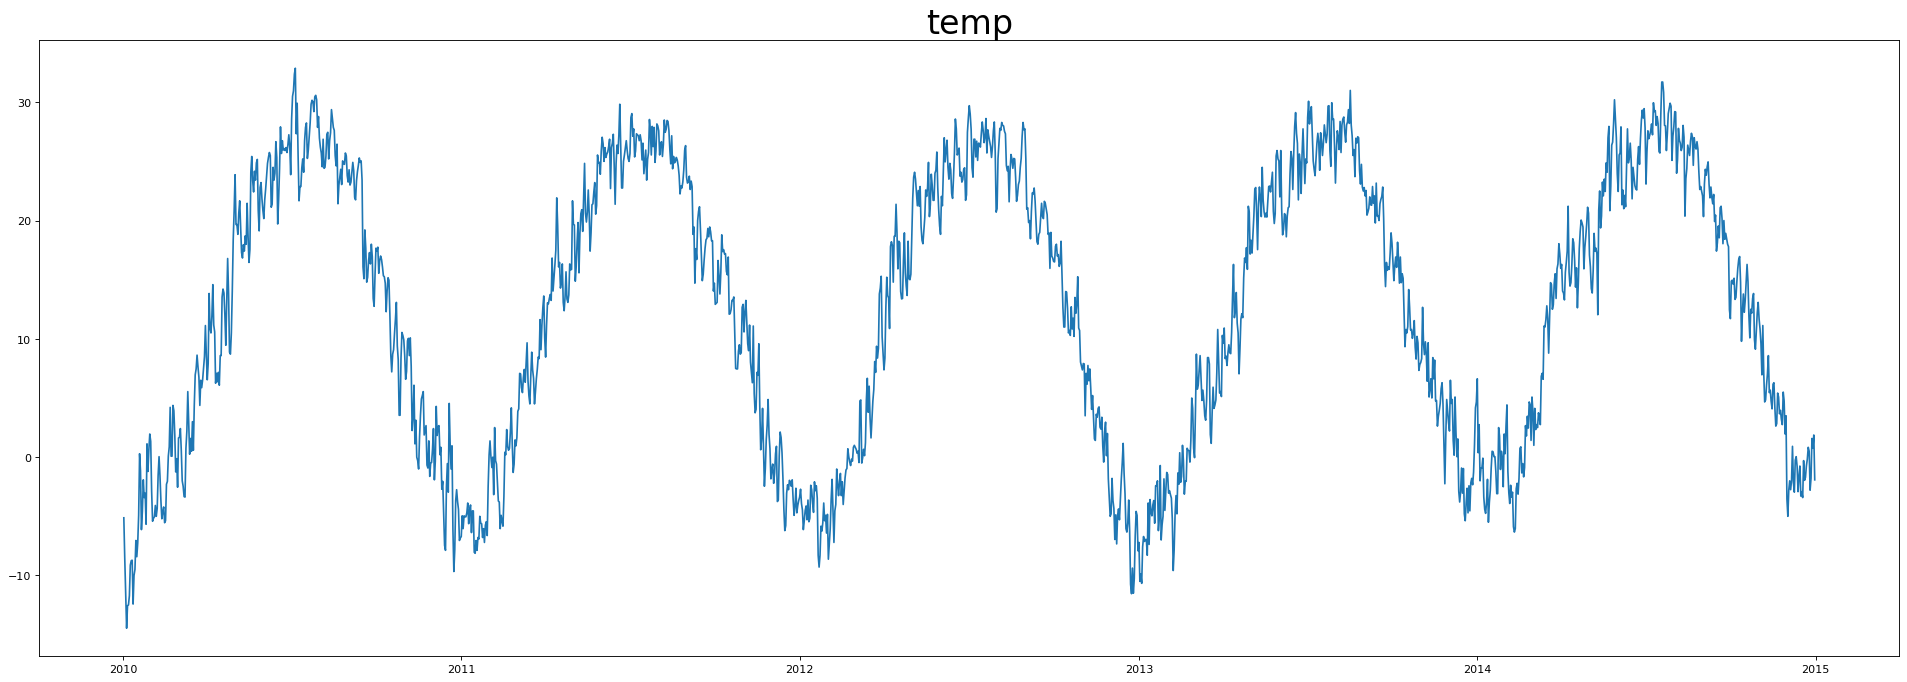

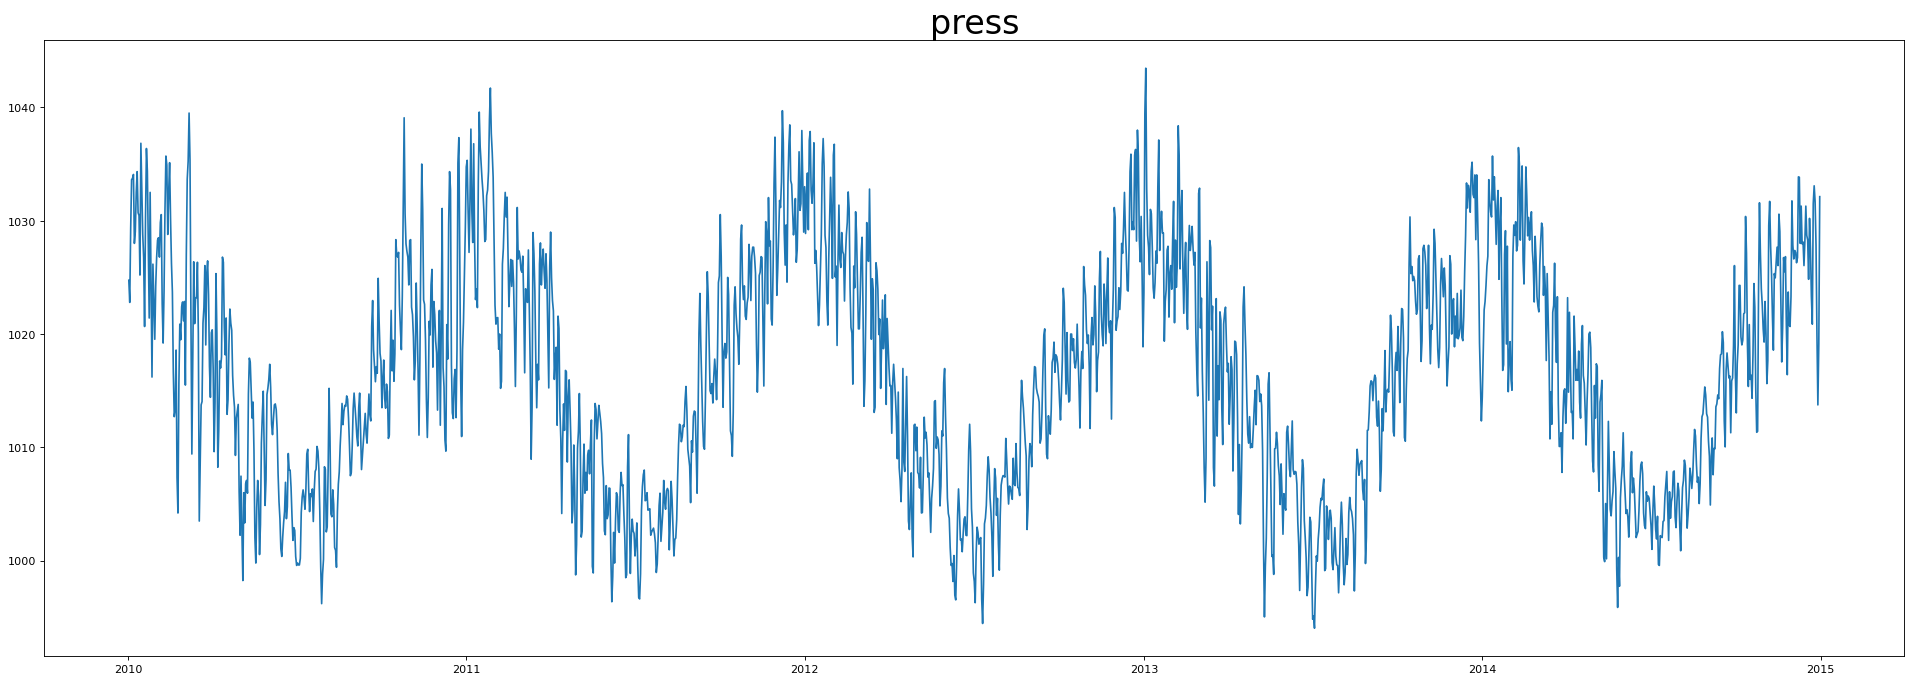

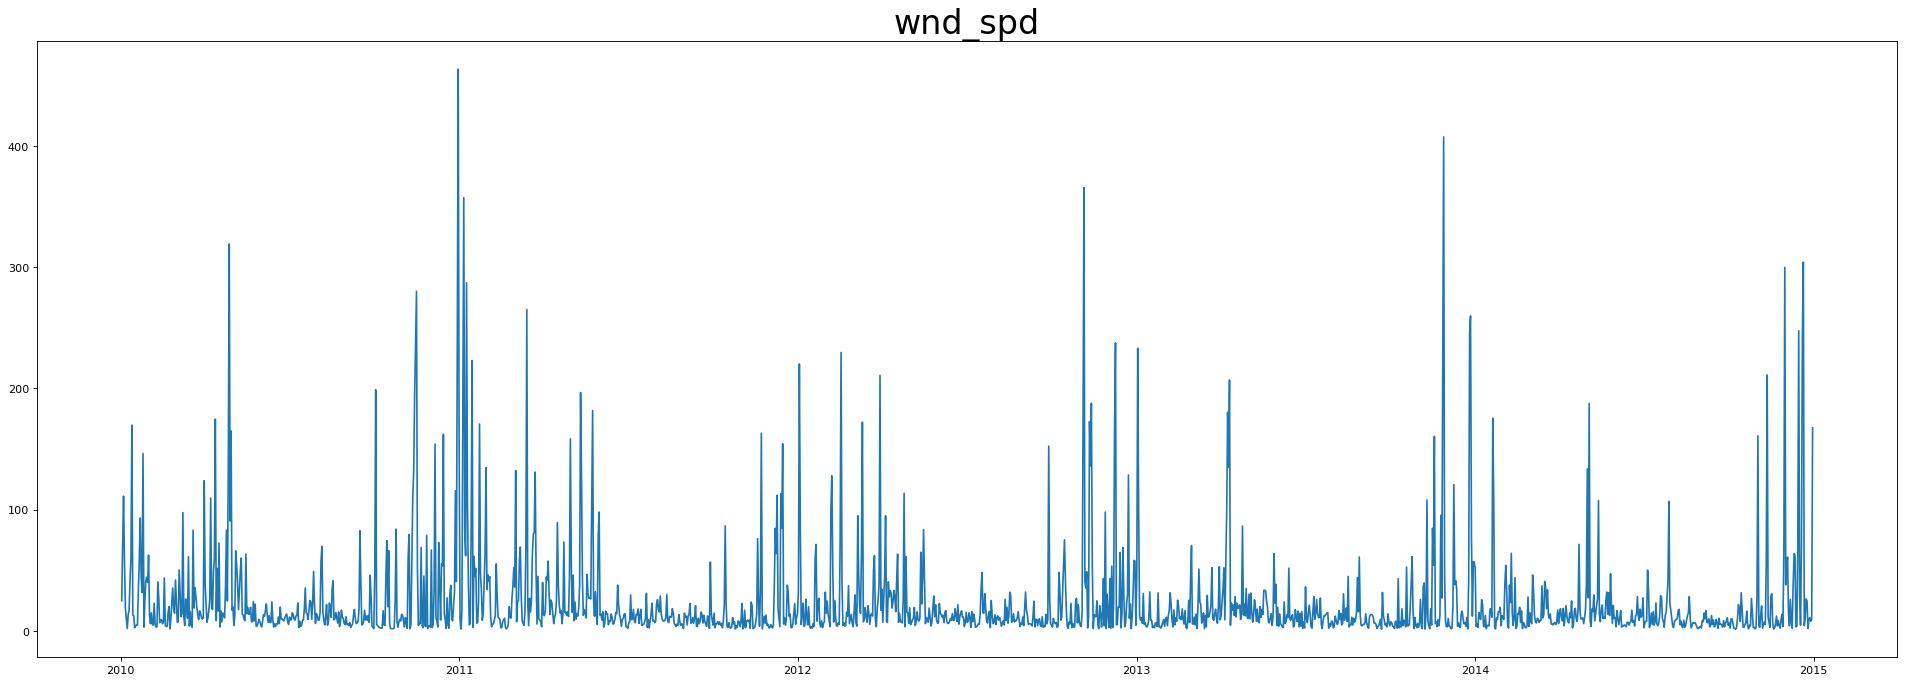

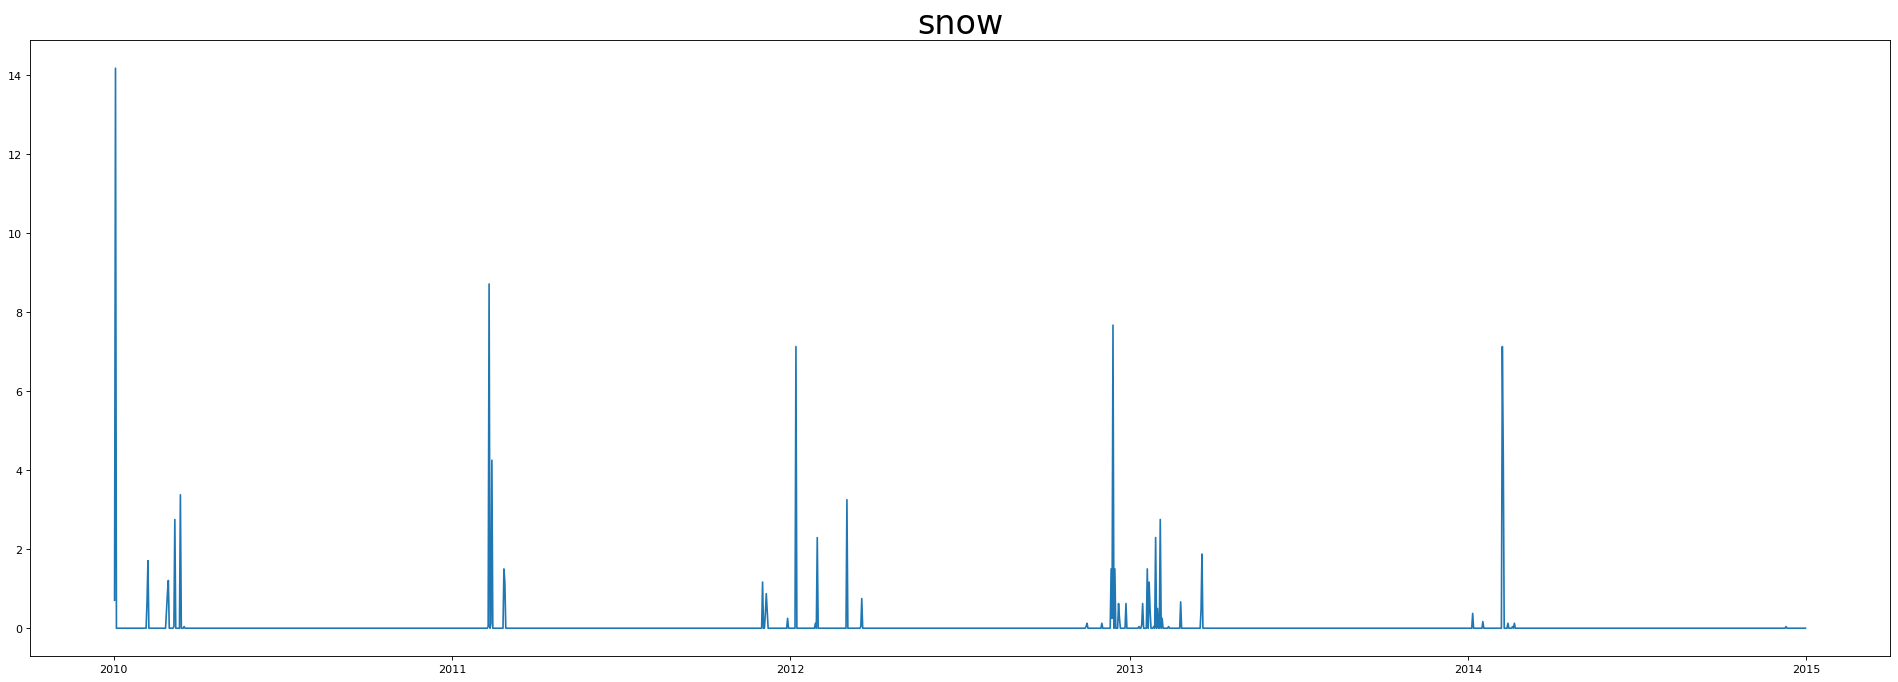

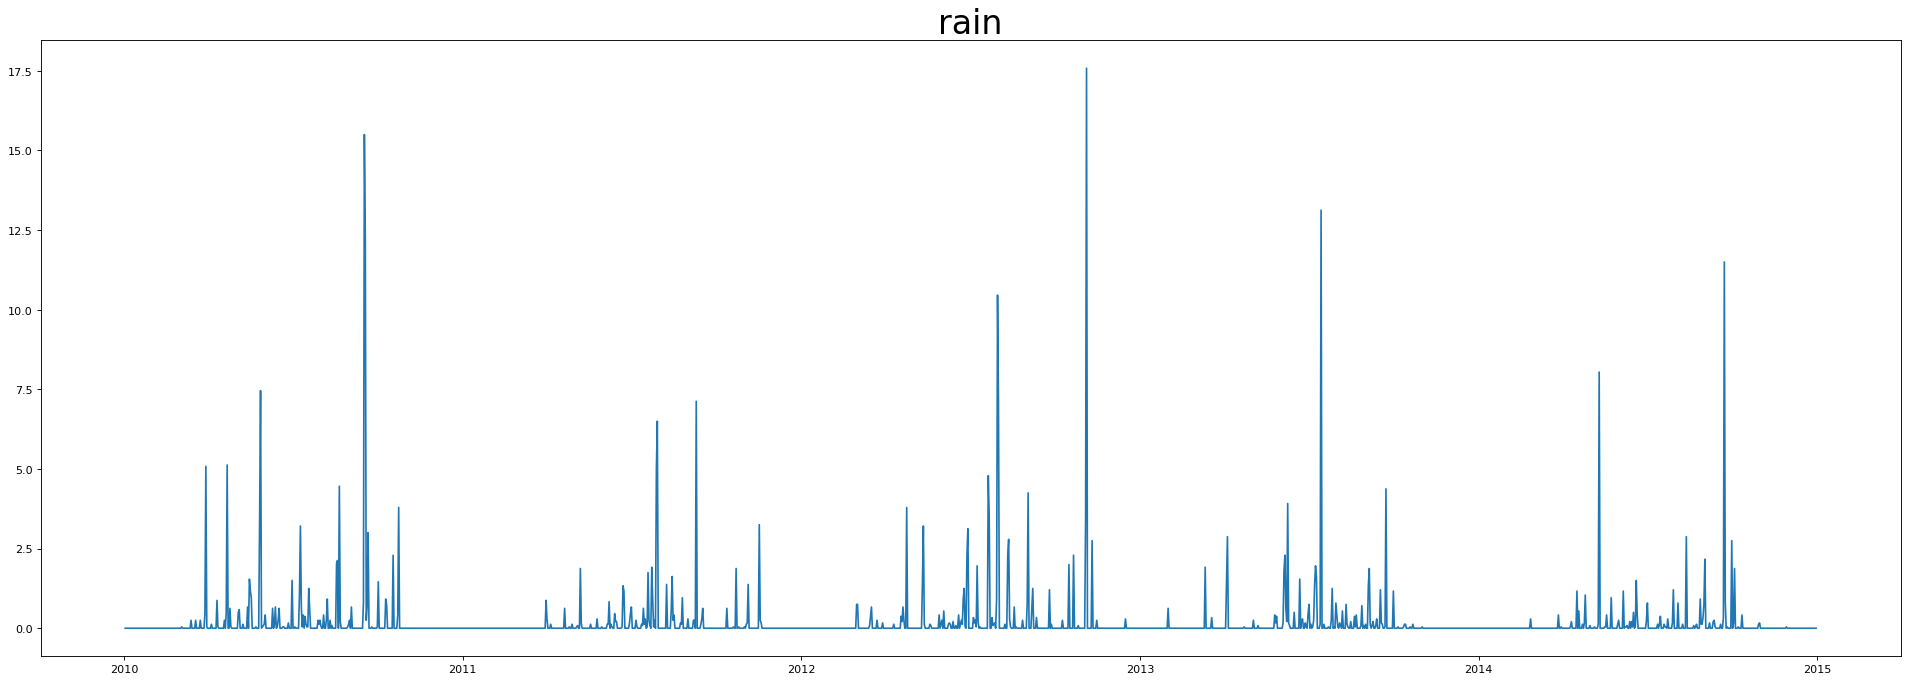

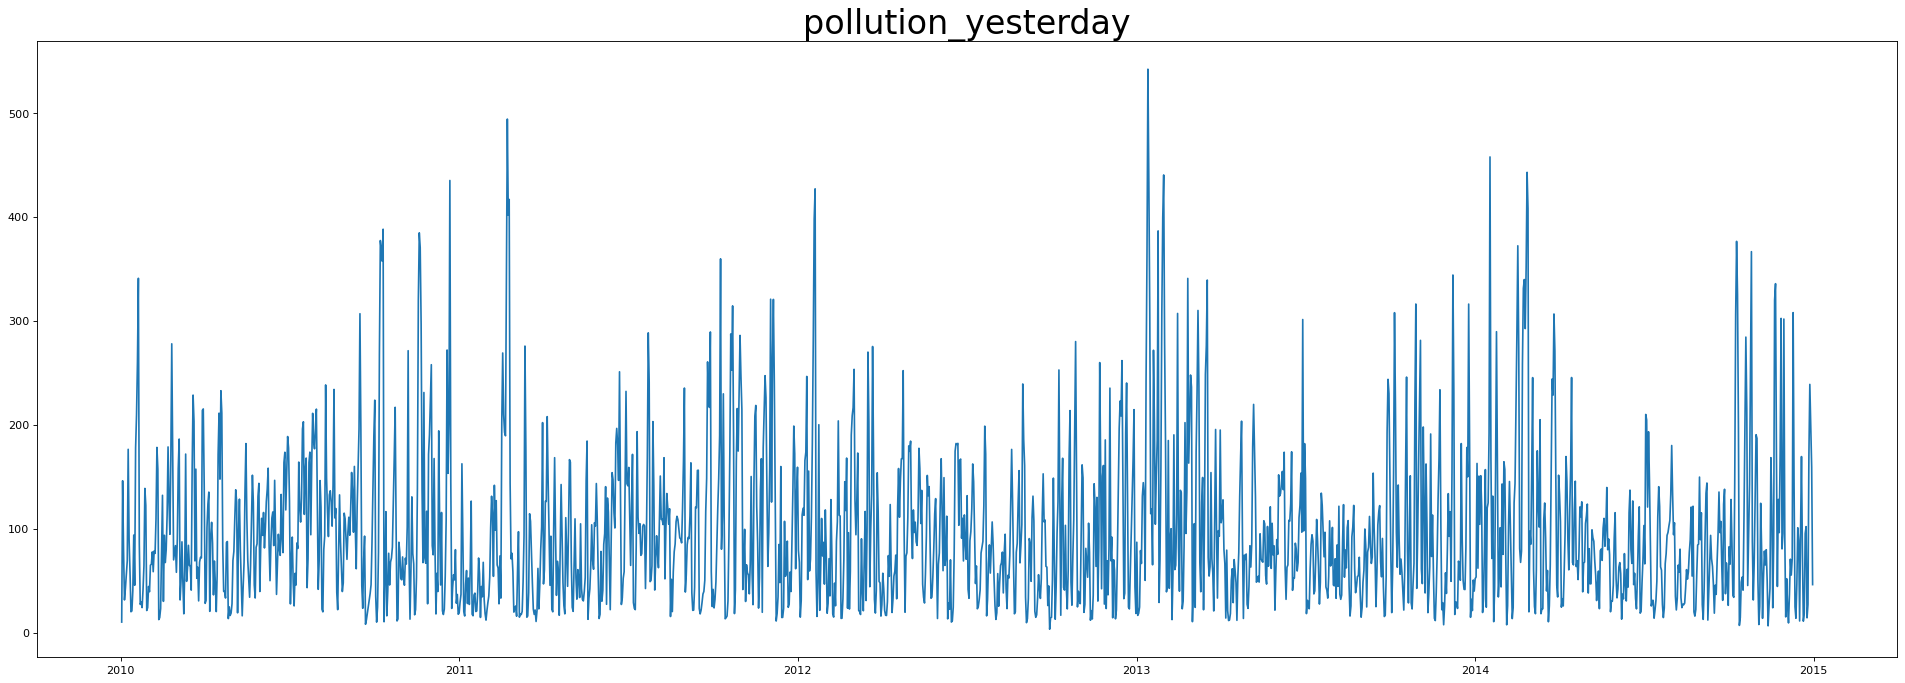

In [16]:
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
#fontsize is set to 30 for better visualization
plt.title('Air pollution', fontsize=30)
#air_pollution.pollution_today will pick the valus of the colomn pollution_today from air_pollution disctionary / dataset
plt.plot(air_pollution.pollution_today)
plt.show()
#Dewpoint visualization, and The dew point is the temperature the air needs to be cooled.
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('dew', fontsize=30)
plt.plot(air_pollution.dew)
plt.show()
#Temperature Visualization
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('temp', fontsize=30)
plt.plot(air_pollution.temp)
plt.show()
#air pressure visualization
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('press', fontsize=30)
plt.plot(air_pollution.press)
plt.show()
#wind speed visualization of the span of 4 year
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('wnd_spd', fontsize=30)
plt.plot(air_pollution.wnd_spd)
plt.show()
#Snow Visualization
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('snow', fontsize=30)
plt.plot(air_pollution.snow)
plt.show()
#Rain Visualization
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('rain', fontsize=30)
plt.plot(air_pollution.rain)
plt.show()
#Yesterday's air pollution
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('pollution_yesterday', fontsize=30)
plt.plot(air_pollution.pollution_yesterday)
plt.show()

# 7. RVT Models in Time Series in Python
The Concept of Resampling, Visualize and Transform

# Automatic time series decomposition

**Lets Define few libraries which we will be using in Automatic Time Series Decomposition

In [19]:
import tensorflow as tf
import statsmodels as sm
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings("ignore")

seed = 42

tf.random.set_seed(seed)
np.random.seed(seed)


plt.style.use('bmh')

from pylab import rcParams
import matplotlib as mpl

mpl.rcParams['axes.labelsize']=14
mpl.rcParams['xtick.labelsize']=12
mpl.rcParams['ytick.labelsize']=12
mpl.rcParams['text.color']='k'

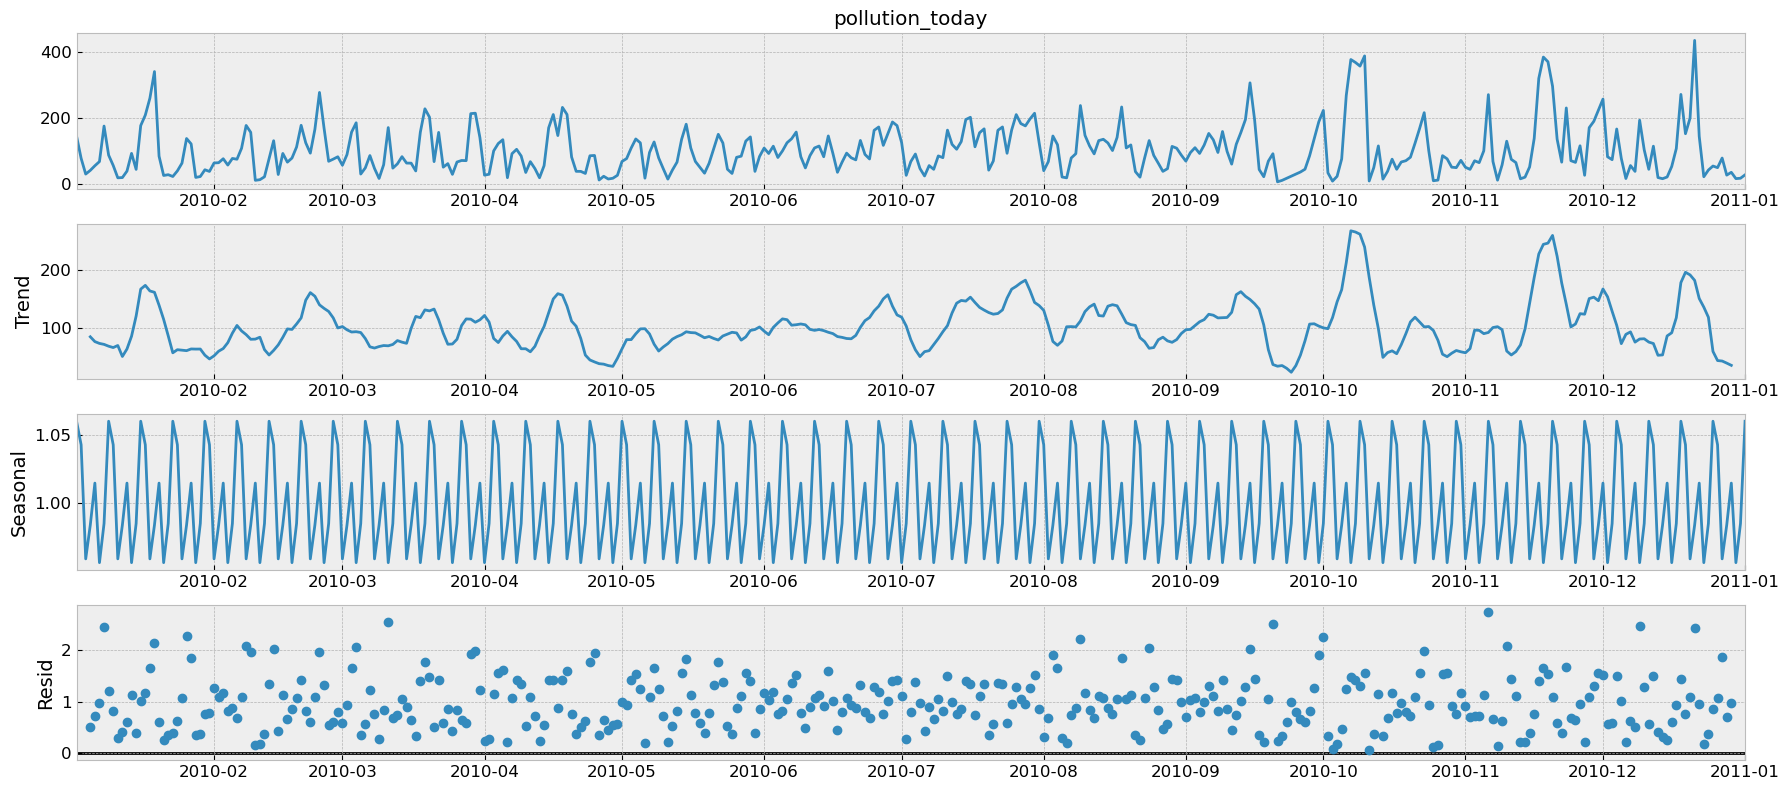

In [20]:
rcParams['figure.figsize']=18, 8
plt.figure(num=None, figsize=(50,20), dpi=80, facecolor='w',edgecolor='k')
series = air_pollution.pollution_today[:365]

result= seasonal_decompose(series, model='multiplicative')
result.plot()

# Trend  in Automatic Time Series Decomposition using Moving Average Filter 

In [21]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

<Figure size 4000x1600 with 0 Axes>

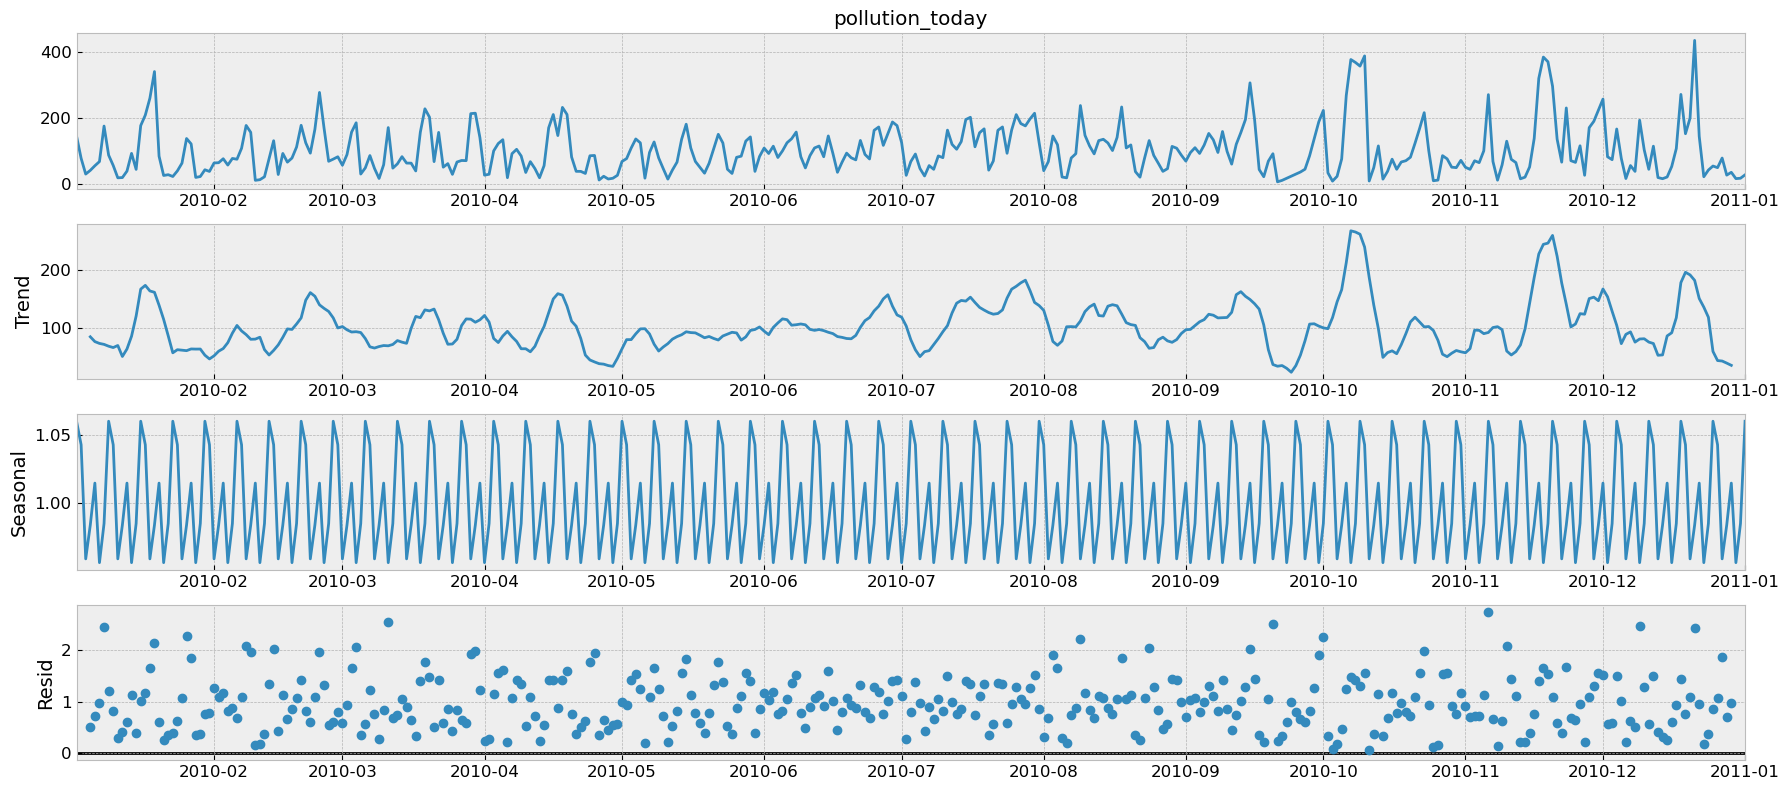

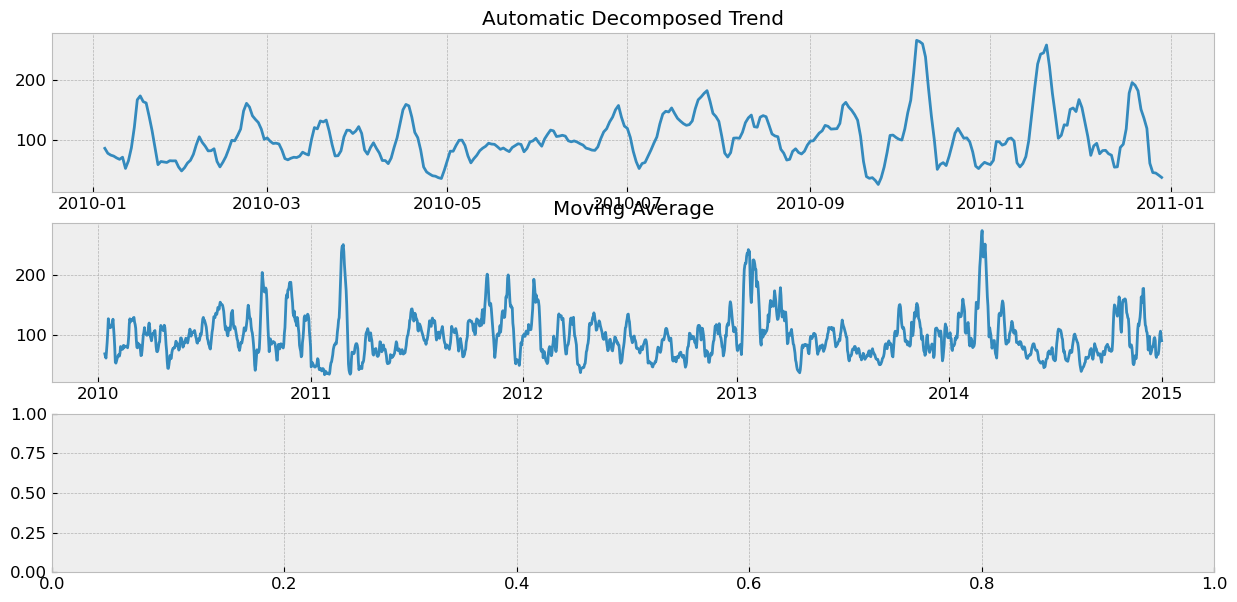

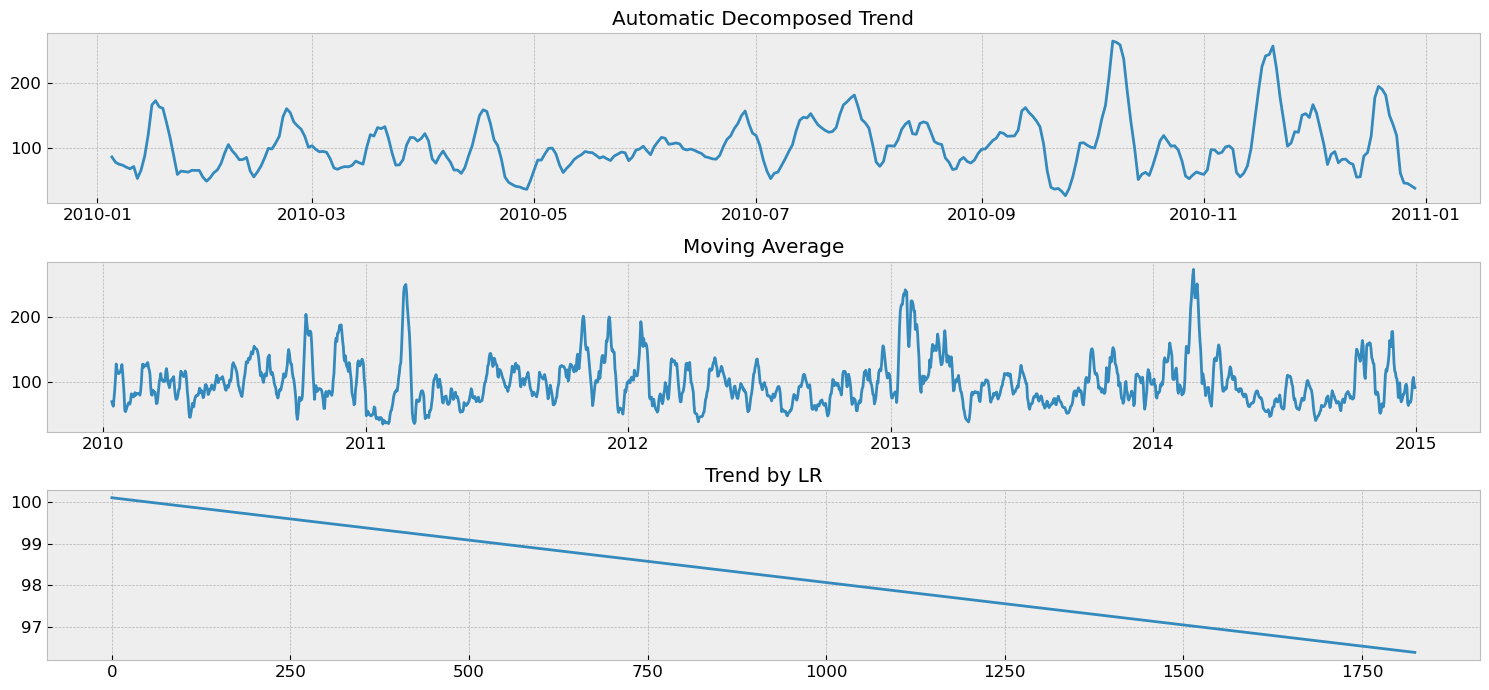

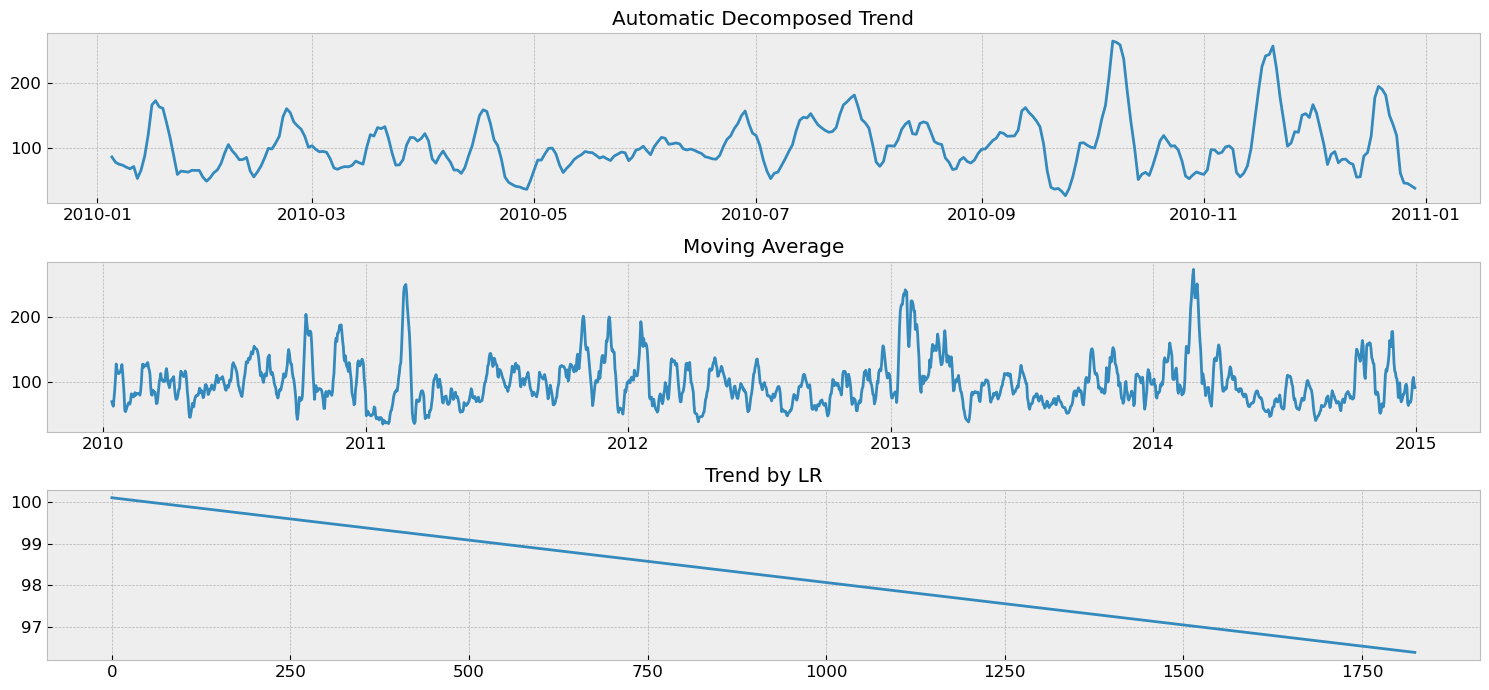

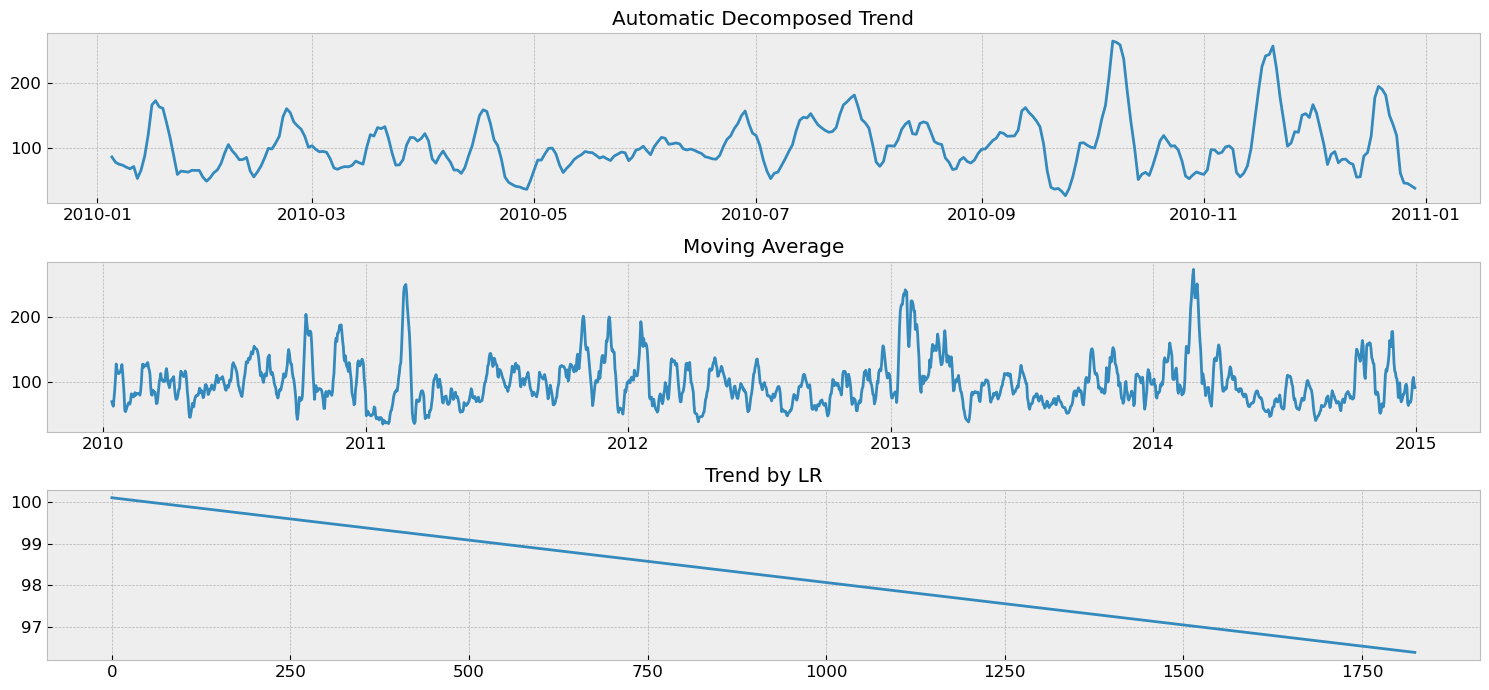

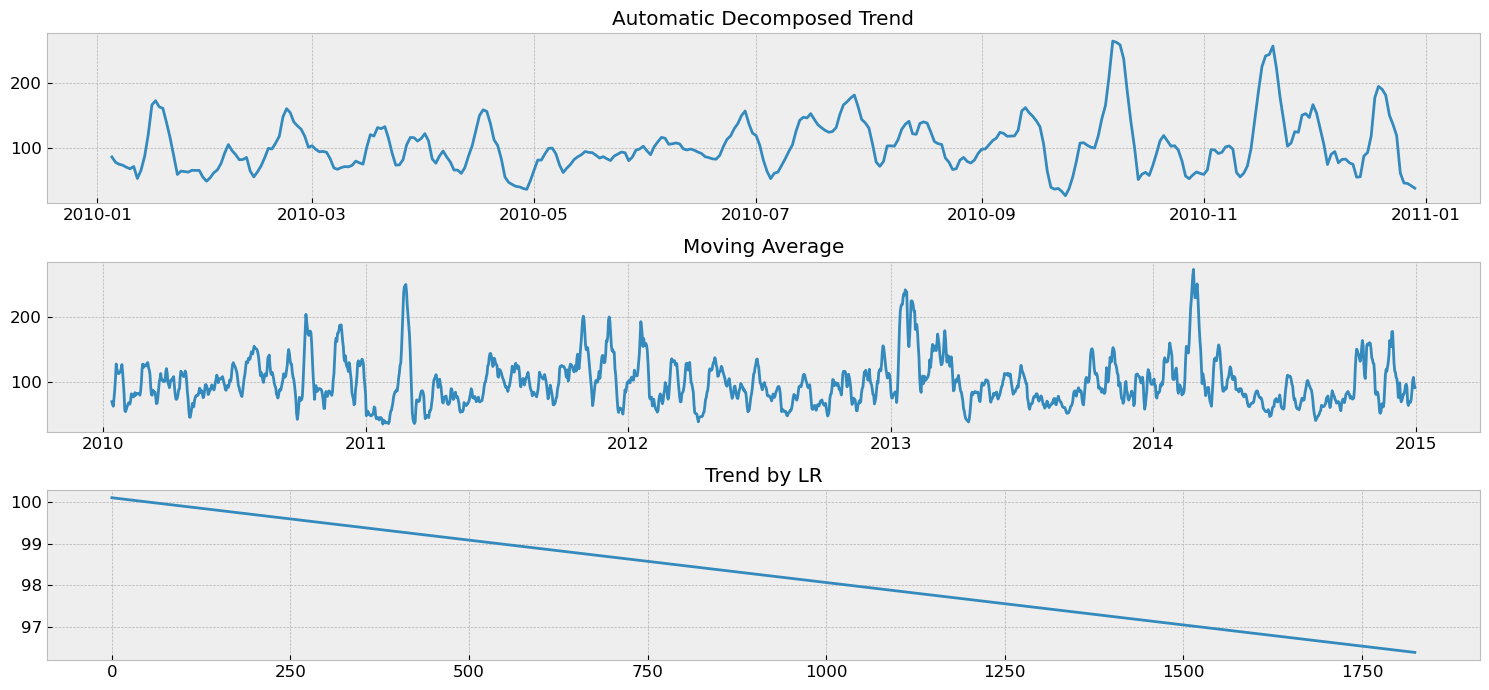

In [26]:
fig = plt.figure(figsize=(15,7))
layout=(3,1)
pm_ax = plt.subplot2grid(layout,(0,0), colspan=2)
mv_ax = plt.subplot2grid(layout,(1,0), colspan=2)
fit_ax = plt.subplot2grid(layout,(2,0), colspan=2)

pm_ax.plot(result.trend)
pm_ax.set_title("Automatic Decomposed Trend")

mm = air_pollution.pollution_today.rolling(12).mean()
mv_ax.plot(mm)
mv_ax.set_title("Moving Average")

X = [i for i in range(0, len(air_pollution.pollution_today))]
X = np.reshape(X, (len(X), 1)) 
y = air_pollution.pollution_today.values 

model = LinearRegression()
model.fit(X, y)

trend = model.predict(X)

fit_ax.plot(trend)
fit_ax.set_title("Trend by LR")

plt.tight_layout()
plt.show()

# Seasonality in Automatic Time Series Decomposition 

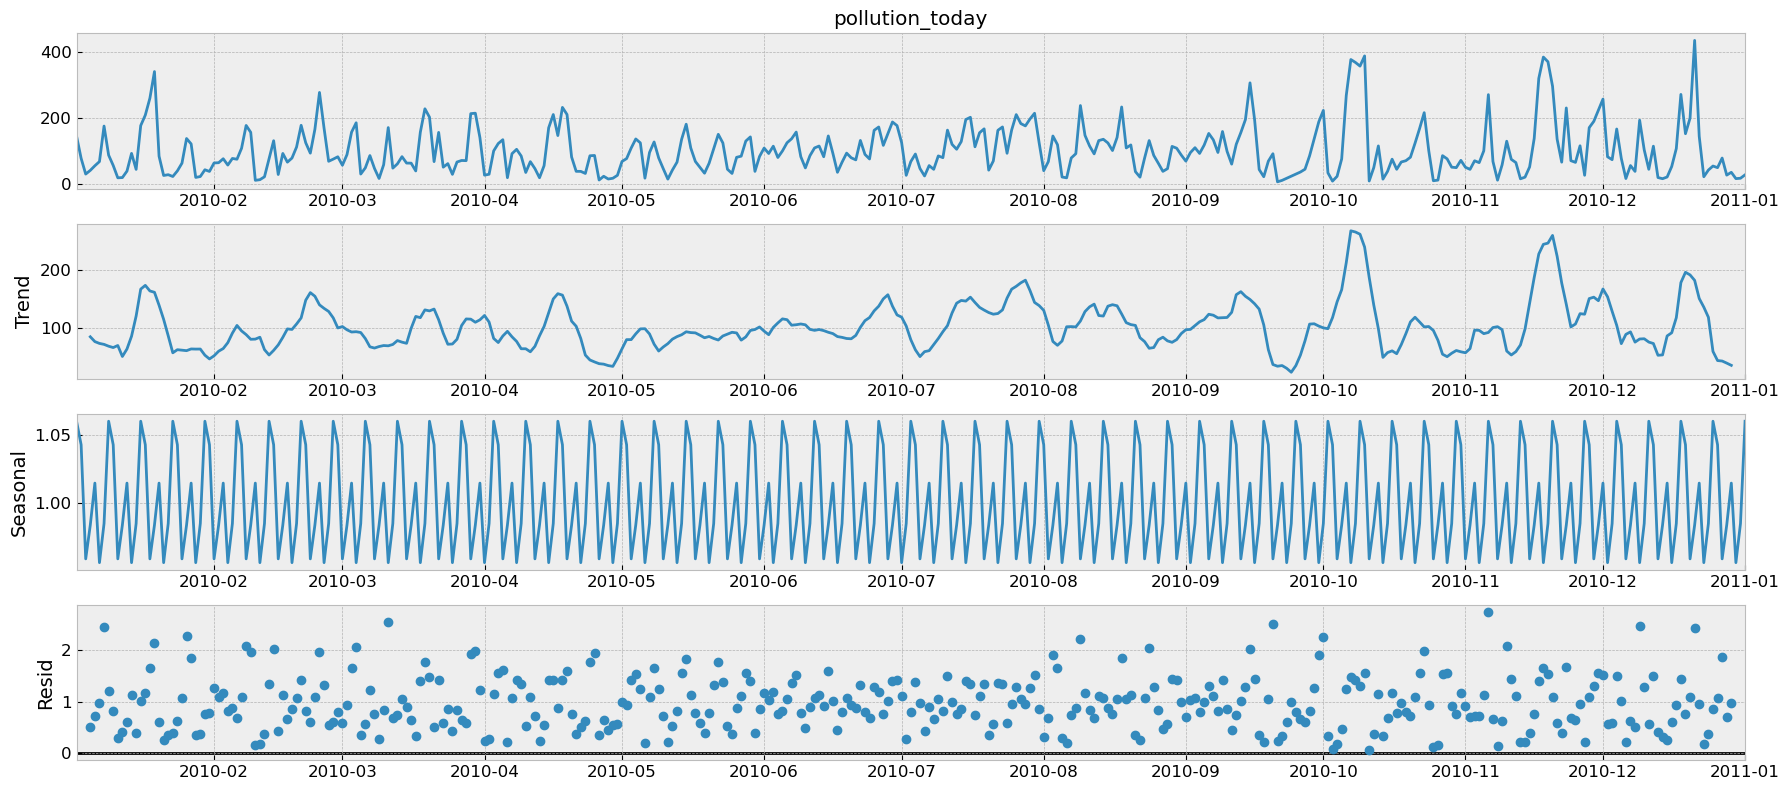

In [27]:
rcParams['figure.figsize']=18, 8
plt.figure(num=None, figsize=(50,20), dpi=80, facecolor='w',edgecolor='k')
series = air_pollution.pollution_today[:365]

result= seasonal_decompose(series, model='multiplicative')
result.plot()

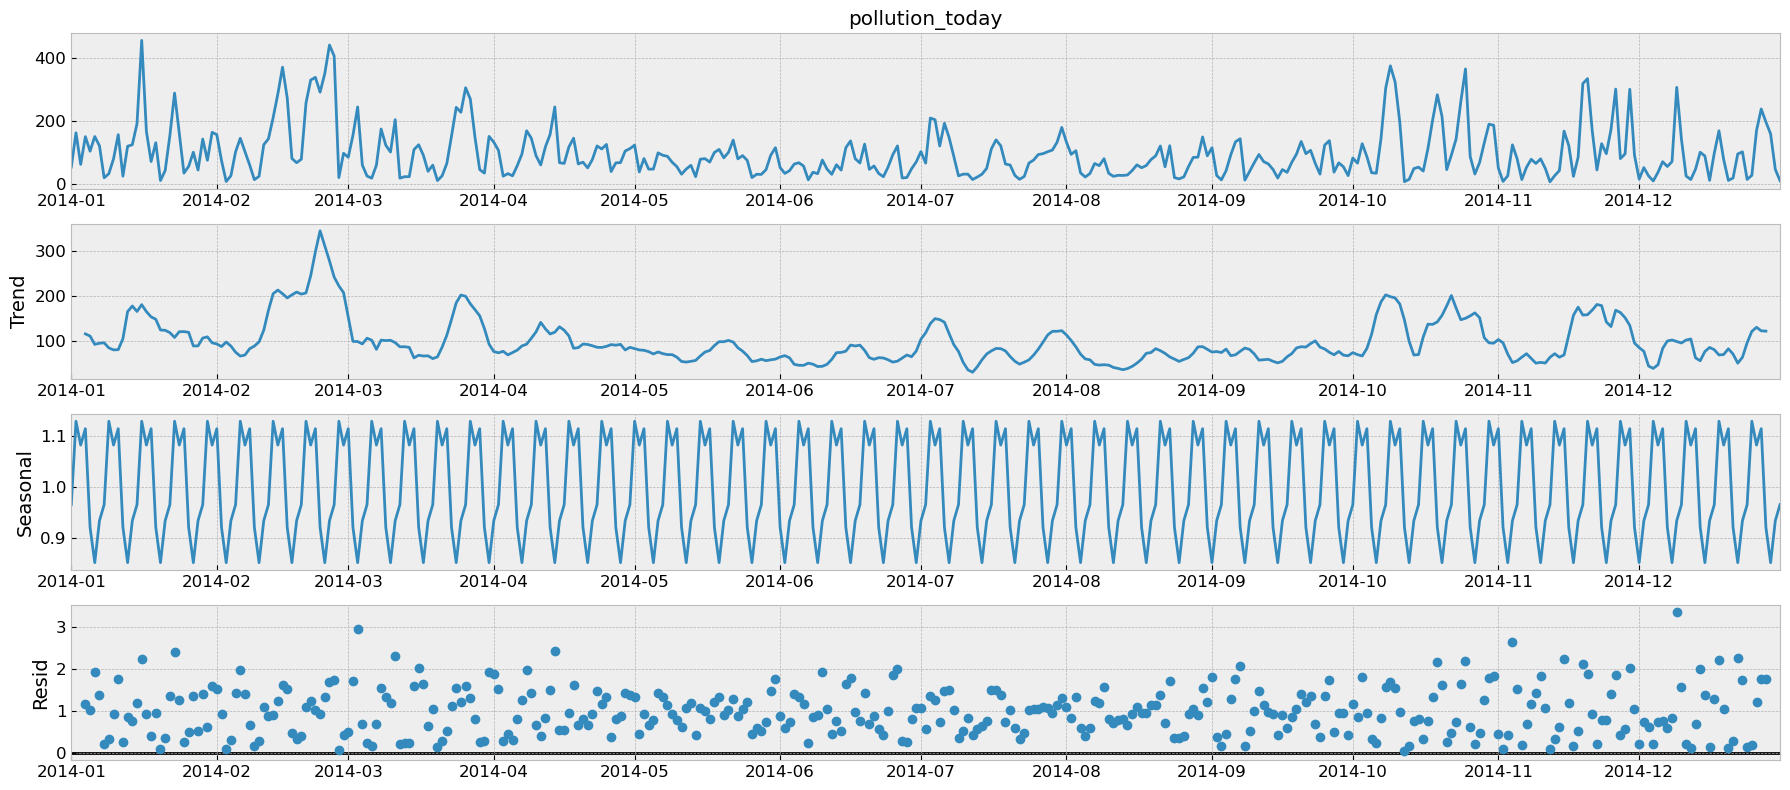

In [28]:
rcParams['figure.figsize']=18, 8
plt.figure(num=None, figsize=(50,20), dpi=80, facecolor='w',edgecolor='k')
series = air_pollution.pollution_today[-365:]

result= seasonal_decompose(series, model='multiplicative')
result.plot()

**Resampling**

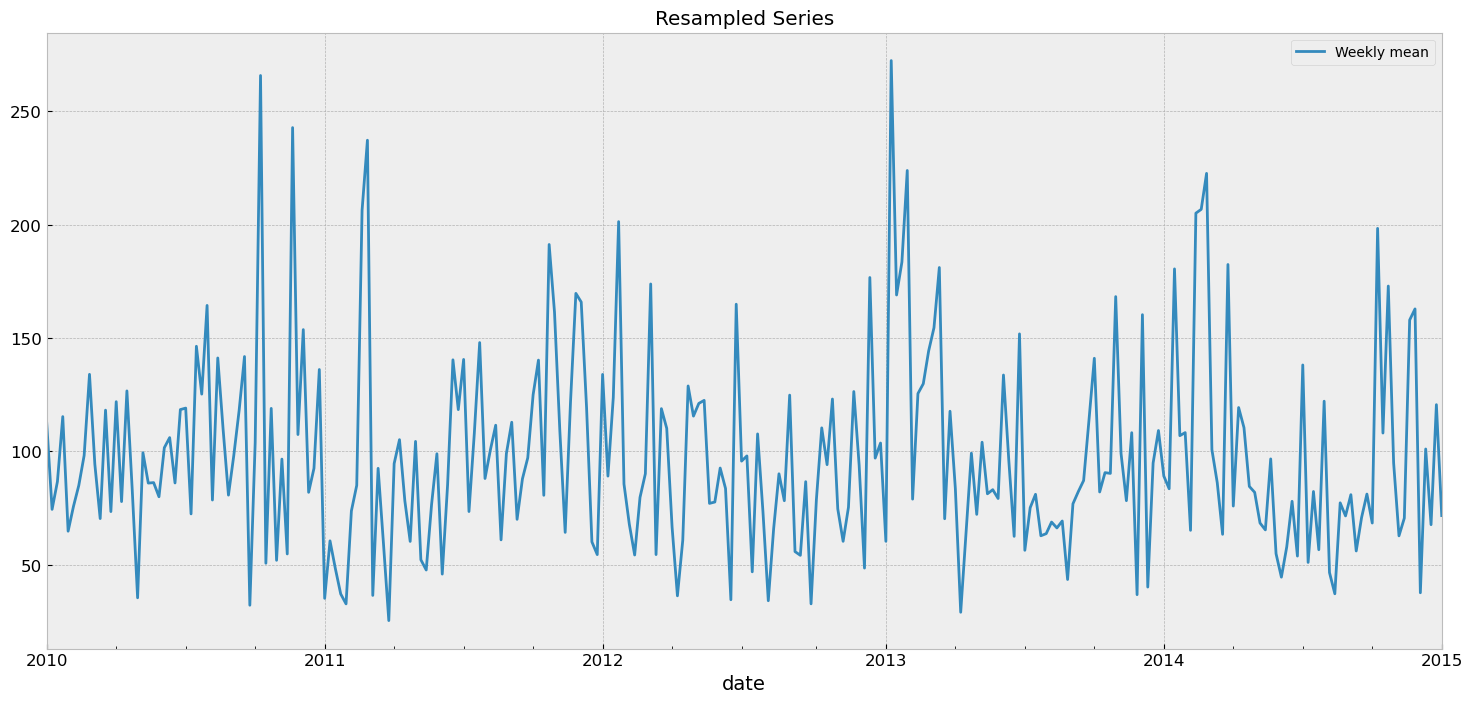

In [33]:
resample = air_pollution.resample('W')
weekly_mean = resample.mean()
weekly_mean.pollution_today.plot(label='Weekly mean')
plt.title("Resampled Series")
plt.legend()
plt.show()

# Noise in Automatic Time Series Decomposition

**Noise**

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

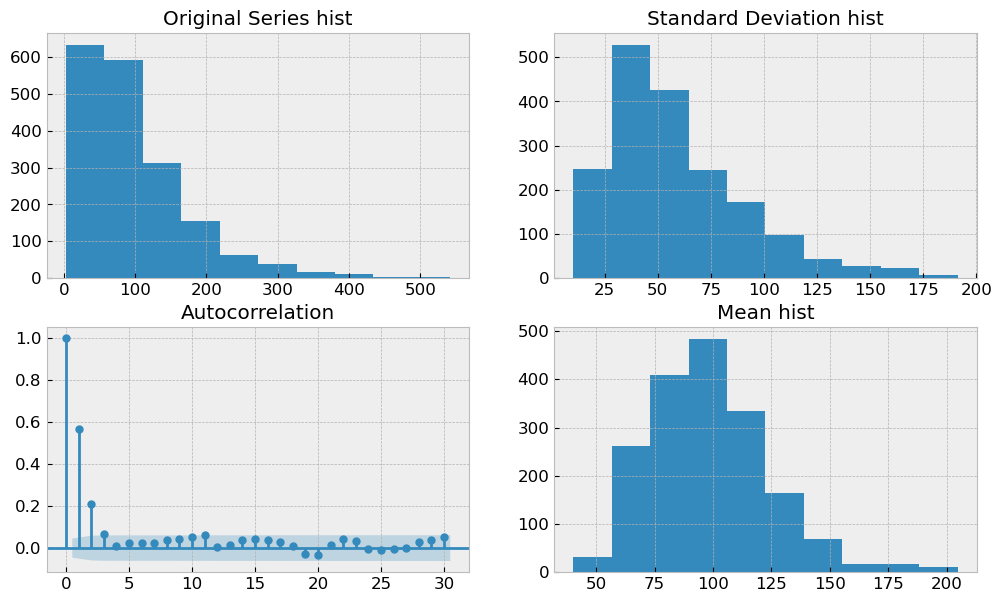

In [44]:
fig = plt.figure(figsize=(12,7))
layout=(2,2)

hist_ax=plt.subplot2grid(layout,(0,0))
ac_ax=plt.subplot2grid(layout,(1,0))
hist_std_ax=plt.subplot2grid(layout,(0,1))
mean_ax=plt.subplot2grid(layout,(1,1))

air_pollution.pollution_today.hist(ax=hist_ax)
hist_ax.set_title("Original Series hist")


plot_acf(air_pollution.pollution_today, lags=30, ax=ac_ax)
ac_ax.set_title("Autocorrelation")

mm = air_pollution.pollution_today.rolling(7).std()
mm.hist(ax=hist_std_ax)
hist_std_ax.set_title("Standard Deviation hist")

mm = air_pollution.pollution_today.rolling(30).mean()
mm.hist(ax=mean_ax)
mean_ax.set_title("Mean hist")

plt.show()

# Feature Engineering and Stationarity in Time Series



**extracting parts of a date**


In [45]:
air_pollution.reset_index(inplace=True)

In [46]:
air_pollution['day']= air_pollution['date'].dt.day
air_pollution['month']= air_pollution['date'].dt.month
air_pollution['year']= air_pollution['date'].dt.year
air_pollution.set_index('date', inplace= True)

air_pollution

pollution_today        dew       temp        press     wnd_spd  \
date                                                                         
2010-01-02       145.958333  -8.500000  -5.125000  1024.750000   24.860000   
2010-01-03        78.833333 -10.125000  -8.541667  1022.791667   70.937917   
2010-01-04        31.333333 -20.875000 -11.500000  1029.291667  111.160833   
2010-01-05        42.458333 -24.583333 -14.458333  1033.625000   56.920000   
2010-01-06        56.416667 -23.708333 -12.541667  1033.750000   18.511667   
...                     ...        ...        ...          ...         ...   
2014-12-27       238.666667  -9.666667  -1.791667  1027.833333    9.278333   
2014-12-28       197.375000 -10.791667   1.583333  1019.958333   10.948750   
2014-12-29       159.000000 -12.333333   0.750000  1013.750000    8.000000   
2014-12-30        46.083333 -13.916667   1.875000  1019.125000    9.778333   
2014-12-31        10.041667 -21.791667  -1.916667  1032.125000  167.458333   

                 snow  rain  pollution_yesterday  day  month  year  
date                                                                
2010-01-02   0.708333   0.0            10.041667    2      1  2010  
2010-01-03  14.166667   0.0           145.958333    3      1  2010  
2010-01-04   0.000000   0.0            78.833333    4      1  2010  
2010-01-05   0.000000   0.0            31.333333    5      1  2010  
2010-01-06   0.000000   0.0            42.458333    6      1  2010  
...               ...   ...                  ...  ...    ...   ...  
2014-12-27   0.000000   0.0           170.250000   27     12  2014  
2014-12-28   0.000000   0.0           238.666667   28     12  2014  
2014-12-29   0.000000   0.0           197.375000   29     12  2014  
2014-12-30   0.000000   0.0           159.000000   30     12  2014  
2014-12-31   0.000000   0.0            46.083333   31     12  2014  

[1825 rows x 11 columns]

**numerical transformations**


In [47]:
air_pollution['pollution_today']= np.round(air_pollution['pollution_today'], decimals=3)
air_pollution['dew']= np.round(air_pollution['dew'], decimals=3)
air_pollution['temp']= np.round(air_pollution['temp'], decimals=3)
air_pollution['pollution_yesterday']= np.round(air_pollution['pollution_yesterday'], decimals=3)

In [48]:
air_pollution

pollution_today     dew    temp        press     wnd_spd  \
date                                                                   
2010-01-02          145.958  -8.500  -5.125  1024.750000   24.860000   
2010-01-03           78.833 -10.125  -8.542  1022.791667   70.937917   
2010-01-04           31.333 -20.875 -11.500  1029.291667  111.160833   
2010-01-05           42.458 -24.583 -14.458  1033.625000   56.920000   
2010-01-06           56.417 -23.708 -12.542  1033.750000   18.511667   
...                     ...     ...     ...          ...         ...   
2014-12-27          238.667  -9.667  -1.792  1027.833333    9.278333   
2014-12-28          197.375 -10.792   1.583  1019.958333   10.948750   
2014-12-29          159.000 -12.333   0.750  1013.750000    8.000000   
2014-12-30           46.083 -13.917   1.875  1019.125000    9.778333   
2014-12-31           10.042 -21.792  -1.917  1032.125000  167.458333   

                 snow  rain  pollution_yesterday  day  month  year  
date                                                                
2010-01-02   0.708333   0.0               10.042    2      1  2010  
2010-01-03  14.166667   0.0              145.958    3      1  2010  
2010-01-04   0.000000   0.0               78.833    4      1  2010  
2010-01-05   0.000000   0.0               31.333    5      1  2010  
2010-01-06   0.000000   0.0               42.458    6      1  2010  
...               ...   ...                  ...  ...    ...   ...  
2014-12-27   0.000000   0.0              170.250   27     12  2014  
2014-12-28   0.000000   0.0              238.667   28     12  2014  
2014-12-29   0.000000   0.0              197.375   29     12  2014  
2014-12-30   0.000000   0.0              159.000   30     12  2014  
2014-12-31   0.000000   0.0               46.083   31     12  2014  

[1825 rows x 11 columns]

#  Stationarity in Time Series  

#  Augmented Dickey-Fuller test for Stationarity in Time Series  


**Augmented Dickey-Fuller test**


In [49]:
from statsmodels.tsa.stattools import adfuller

In [50]:
X = air_pollution.pollution_today.values

In [51]:
result = adfuller(X)

In [53]:
print('ADF Statistics: %f'% result[0])
print('p value %f'% result[1])
print('critical values:')
for key, value in result[4].items():
    print('\t%s: %.3f'%(key, value))

ADF Statistics: -10.116719
p value 0.000000
critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


# How to Make any time series a Stationary Time Series

In [54]:
passengers = pd.read_csv("datasets/international_airline_passengers.csv")

In [55]:
passengers.head()

time  passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121

In [56]:
result = adfuller(passengers['passengers'])

In [57]:
print('ADF Statistics: %f'% result[0])
print('p value %f'% result[1])
print('critical values:')
for key, value in result[4].items():
    print('\t%s: %.3f'%(key, value))

ADF Statistics: 0.815369
p value 0.991880
critical values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [58]:
df_log = np.sqrt(passengers['passengers'])
df_diff = df_log.diff().dropna()

In [59]:
result = adfuller(df_diff)
print('ADF Statistics: %f'% result[0])
print('p value %f'% result[1])
print('critical values:')
for key, value in result[4].items():
    print('\t%s: %.3f'%(key, value))

ADF Statistics: -3.186422
p value 0.020784
critical values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
